In [27]:
import csv
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from matplotlib import cm
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#import plotly.express as px
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split #splitting the dataset
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix,r2_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn import svm
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve, recall_score,precision_score
from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score
#from sklearn.metrics import classification_report,plot_precision_recall_curve, average_precision_score, precision_recall_curve
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats
from scipy.stats import ranksums
from scipy.stats import mannwhitneyu, normaltest
#!pip install statannotations
#from statannotations.Annotator import Annotator
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
#from bioinfokit.visuz import cluster
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from IPython.display import Image
#from pydotplus import graph_from_dot_data
from sklearn.feature_selection import SelectFromModel
#from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from scipy.stats import shapiro
from scipy.stats import boxcox
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import KFold
import pickle
import joblib
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from scipy.optimize import curve_fit
from scipy.stats import sem, t
#classes for grid search and cross-validation, function for splitting data and evaluating models
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from xgboost import XGBClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
#Python standard libraries
import time
#from tabpfn import TabPFNClassifier
import warnings
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim
from ctgan import CTGAN
from ctgan.synthesizers.ctgan import Generator
from sklearn.svm import SVC
#setting default resolution of figures
mpl.rcParams['figure.dpi'] = 300
%matplotlib inline


In [2]:
#data imports
data_train_df = pd.read_csv("../paper_analysis/IDT_Reps_BED_BAM_TPFP_Final_01312023.csv")
valid_data_df = pd.read_csv("SangerVariants_VerSamples_IDTProbes_NGS82-VE070_hom0_random200probes_variants.csv")
drop_probe_list = valid_data_df.probe.tolist()
data_train_df = data_train_df[~data_train_df['probe'].isin(drop_probe_list)]
data_train_df

probe  isize_mean  isize_std  isize_min  \
0       chr10_100003821_100003941  112.000000  14.525839       98.0   
1       chr10_100008652_100008772  164.500000  29.904013      146.0   
2       chr10_100010817_100010937  113.333333  30.072136       79.0   
3       chr10_100011271_100011391  148.333333  20.502032      128.0   
4       chr10_100011391_100011511  195.333333  14.597374      178.5   
...                           ...         ...        ...        ...   
425650       chrY_9366880_9367000  191.333333  23.671361      164.0   
425651       chrY_9366989_9367109  149.500000  26.556543      119.0   
425652       chrY_9367109_9367229  161.666667  17.897858      142.0   
425653       chrY_9367264_9367384  231.333333  20.207259      208.0   
425654       chrY_9368016_9368136  196.333333  34.818577      158.0   

        isize_median  isize_max  proper_pair_mean  proper_pair_std  \
0              111.0      127.0               1.0              0.0   
1              148.5      199.0               1.0              0.0   
2              126.0      135.0               1.0              0.0   
3              148.0      169.0               1.0              0.0   
4              203.0      204.5               1.0              0.0   
...              ...        ...               ...              ...   
425650         205.0      205.0               1.0              0.0   
425651         162.0      167.5               1.0              0.0   
425652         166.0      177.0               1.0              0.0   
425653         243.0      243.0               1.0              0.0   
425654         205.0      226.0               1.0              0.0   

        proper_pair_min  proper_pair_median  ...  \
0                   1.0                 1.0  ...   
1                   1.0                 1.0  ...   
2                   1.0                 1.0  ...   
3                   1.0                 1.0  ...   
4                   1.0                 1.0  ...   
...                 ...                 ...  ...   
425650              1.0                 1.0  ...   
425651              1.0                 1.0  ...   
425652              1.0                 1.0  ...   
425653              1.0                 1.0  ...   
425654              1.0                 1.0  ...   

        SimpleRepeat_quadTR_51to200.RPO  SimpleRepeat_triTR_11to50.PO  \
0                                   NaN                           NaN   
1                                   NaN                           NaN   
2                                   NaN                           NaN   
3                                   NaN                           NaN   
4                                   NaN                           NaN   
...                                 ...                           ...   
425650                              NaN                           NaN   
425651                              NaN                           NaN   
425652                              NaN                           NaN   
425653                              NaN                           NaN   
425654                              NaN                           NaN   

        SimpleRepeat_triTR_11to50.RPO  SimpleRepeat_triTR_51to200.PO  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
425650                            NaN                            NaN   
425651                            NaN                            NaN   
425652                            NaN                            NaN   
425653                            NaN                            NaN   
425654                            NaN   

In [3]:
#create the class labels
data_train_df = data_train_df[~data_train_df['eight_and_GIAB'].isna()]
data_train_df = data_train_df.fillna(0)
data_train_df = data_train_df.reset_index(drop=True)
data_train_df['Class'] = data_train_df['eight_and_GIAB'].map({True : 0, False: 1})
data_train_df.Class.value_counts()


0    34625
1     5680
Name: Class, dtype: int64

In [4]:
#balance the data
class_0_df = data_train_df[data_train_df['Class'] == 0]
class_1_df = data_train_df[data_train_df['Class'] == 1]
min_class_size = min(len(class_0_df), len(class_1_df))
class_0_sampled = class_0_df.sample(n=min_class_size, random_state=42)
class_1_sampled = class_1_df.sample(n=min_class_size, random_state=42)
balanced_df = pd.concat([class_0_sampled, class_1_sampled])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(balanced_df['Class'].value_counts())

0    5680
1    5680
Name: Class, dtype: int64


In [5]:
#select only number columns and filter by variance threshold


def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

data_only_df = balanced_df.select_dtypes(include=np.number)

cols_to_remove = ['raw_dp_std', 'raw_dp_min', 'raw_dp_median',
                  'normalized_raw_dp_mean', 'normalized_raw_dp_std',
                  'normalized_raw_dp_min', 'normalized_raw_dp_median',
                  'count_mapq_Lt10_std', 'count_mapq_Lt10_min',
                  'count_mapq_Lt10_median', 'pct_count_mapq_Lt10_std','homology_mean', 
                  'homology_min', 'homology_median',
                  'pct_count_mapq_Lt10_min', 'pct_count_mapq_Lt10_median',
                  'homology_std', 'homology_max',"NGS82_Homolgy_Probes_V2.PO",
                  "NGS82_Homolgy_Probes_V2.RPO",
                  "proper_pair_std", "proper_pair_mean",  "proper_pair_min",
                  "isize_min", "mm-2-merged-complement.PO",
                  "mm-2-merged-complement.RPO",'mm-2-merged.PO', 'mm-2-merged.RPO',
                 'isize_max', 'AS_max', 'MQ_max', 'normalized_raw_dp_max', 'count_mapq_Lt10_max']

data_only_df = data_only_df.drop(cols_to_remove, axis=1)
var_thr = VarianceThreshold(threshold=0.05)
data_only_filtered_df = data_only_df.loc[:, var_thr.fit(data_only_df).get_support()]
labels = data_only_filtered_df['Class']
data_cols_df = data_only_filtered_df.drop(columns=['Class'])
data_filtered_df = correlation(data_cols_df, 0.9)
model_cols = data_filtered_df.columns
data_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11360 entries, 0 to 11359
Data columns (total 60 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   isize_mean                                              11360 non-null  float64
 1   isize_median                                            11360 non-null  float64
 2   MAPQ_mean                                               11360 non-null  float64
 3   MAPQ_std                                                11360 non-null  float64
 4   AS_mean                                                 11360 non-null  float64
 5   AS_std                                                  11360 non-null  float64
 6   XS_mean                                                 11360 non-null  float64
 7   XS_std                                                  11360 non-null  float64
 8   MQ_std                              

In [6]:
name_change_dict = {'GRCh37_SimpleRepeat_homopolymer_7to11_slop5.RPO' : "NIST_SR_HP_7t11_slop5.RPO",
       'GRCh37_notinsegdups.PO':"NIST_notSD.PO",
       'GRCh37_AllTandemRepeatsandHomopolymers_slop5.RPO':"NIST_ATRH_slop5.RPO",
       'hg19_self_chain_split_both.PO': "NIST_SCSB.PO",
       'AllRepeats_lt51bptandemrepeats_gt95identity_merged_slop5.RPO': "AR_lt51TB_gt95_slop5.PRO",
       'human_g1k_v37_l100_gc55to60_slop50.PO':"gc55to60_slop50.PO",
       'human_g1k_v37_l100_gclt30orgt55_slop50.PO': "gclt30orgt55_slop50.PO",
       'GRCh37_notinlowmappabilityall.PO': "NIST_notinLM.PO",
        'GRCh37_gc65to70_slop50.PO': "NIST_gc65to70_slop50.PO",
       'siren_similarRegions_dist1.PO': "Siren.PO", 
       'human_g1k_v37_l100_gclt25orgt65_slop50.PO': "gclt25orgt65_slop50.PO",
       'GRCh37_notinAllTandemRepeatsandHomopolymers_slop5.PO': "NIST_NIATRH_slop5.PO", 
       'GRCh37_alldifficultregions.PO': "NIST_alldifficultregions.PO",
       'GRCh37_alldifficultregions.RPO': "NIST_alldifficultregions.RPO",
       'GRCh37_notinalllowmapandsegdupregions.PO': "NIST_NIALMSDR.PO", 
       'refseq_union_cds_no_anno.PO': "refseq_CDS.PO",
        'refseq_union_cds_no_anno.RPO': "refseq_CDS.RPO",
       'GRCh37_SimpleRepeat_homopolymer_4to6_slop5.RPO': "NIST_SRH4to6_slop5.RPO",
       'GRCh37_chainSelf_gt10kb.PO': "NIST_chain_gt10KB.PO",
        'SimpleRepeat_homopolymer_6to10.RPO': "SR_HP_6to10.RPO",
       'hg19_self_chain_split_both_gt10k.PO': "hg19_SCSB_gt10K.PO",
        'GRCh37_gclt25orgt65_slop50.PO': "NIST_gclt25orgt65_slop50.PO",
       'SimpleRepeat_imperfecthomopolgt10_slop5.RPO': "SR_Ihpgt10_slop5.RPO",
       'GRCh37_AllHomopolymers_gt6bp_imperfectgt10bp_slop5.RPO': "NIST_Ahp_gt6_igt10bp_splop5.RRO",
       'GRCh37_notinalldifficultregions.PO': "NIST_naDiffreg.PO",
       'human_g1k_v37_l100_gc30to55_slop50.PO': "gc30to55_slop50.PO",
       'GRCh37_gclt30orgt55_slop50.PO': "NIST_gclt30orgt55_slop50.PO",
       'human_g1k_v37_l100_gc65to70_slop50.PO' : "gc65to70_slop50.PO",
       'GRCh37_alllowmapandsegdupregions.PO': "NIST_LowSegDupReg.PO",
       'hg19_self_chain_split_withalts_gt10k.PO': "split_withalts_gt10k.PO",
       'notinAllRepeats_gt95percidentity_slop5.PO': "NotinRep_gt95_slop5.PO",
       'AllRepeats_gt95percidentity_slop5.RPO': "AllRep_gt95iden_slop5.RPO",
       'AllRepeats_lt51bp_gt95identity_merged_slop5.RPO': "AllRep_lt51_gt95iden_slop5.RPO",
       'AllRepeats_lt51bp_gt95identity_merged.RPO': "AllRep_lt51_gt95iden.RPO",
       'AllRepeats_lt51bptandemrepeats_gt95identity_merged.RPO': "AllRep_lt51tandemgt95.RPO",
       'human_g1k_v37_l100_gc60to65_slop50.PO': "gc60to65_slop50.PO", 
       'GRCh37_SimpleRepeat_imperfecthomopolgt10_slop5.RPO': "NIST_SR_impHomo10_slop5.RPO",
        'GRCh37_allOtherDifficultregions.PO': 'NIST_allOthDiffReg.PO',
        'human_g1k_v37_gemmap_l150_m2_e1_nonuniq.PO': 'gen_l150_m2_e1_nonuniq.PO', 
        'GRCh37_AllTandemRepeats_gt100bp_slop5.PO': "NIST_ATRep_gt100bp_slop5.PO",
        'human_g1k_v37_gemmap_l150_m1_e0_nonuniq.PO': 'gen_l150_m1_e0_nonuniq.PO',
        'GRCh37_AllTandemRepeatsandHomopolymers_slop5.PO':'NIST_ATrepHomo_slop5.PO',
        'human_g1k_v37_gemmap_l100_m1_e0_nonuniq.PO': 'gen_l100_m1_e0_nonuniq.PO',
        'human_g1k_v37_gemmap_l250_m1_e0_nonuniq.PO': 'gen_l250_m1_e0_nonuniq.PO',
         'Human_Full_Genome_TRDB_hg19_150331_all_merged.PO':'hg19_150331_all_merged.PO', 
        'human_g1k_v37_gemmap_l100_m0_e0_nonuniq.PO':"gen_l100_m0_e0_nonuniq.PO",
        'GRCh37_SimpleRepeat_homopolymer_gt11_slop5.RPO':'NIST_SRhomogt11_slop5.RPO',
        'human_g1k_v37_gemmap_l150_m2_e0_nonuniq.PO':'gen_l150_m2_e0_nonuniq.PO',
        'human_g1k_v37_gemmap_l250_m2_e1_nonuniq.PO':'gen_l250_m2_e1_nonuniq.PO',
        'human_g1k_v37_gemmap_l100_m2_e1_nonuniq.PO':"gen_l100_m2_e1_nonuniq.PO",
         'human_g1k_v37_gemmap_l100_m2_e0_nonuniq.PO':"gen_l100_m2_e0_nonuniq.PO",
        'human_g1k_v37_gemmap_l125_m2_e0_nonuniq.PO':"gen_l125_m2_e0_nonuniq.PO",
        'human_g1k_v37_gemmap_l125_m0_e0_nonuniq.PO':'gen_l125_m0_e0_nonuniq.PO',
        'human_g1k_v37_gemmap_l250_m2_e0_nonuniq.PO':'gen_l250_m2_e0_nonuniq.PO',
        'human_g1k_v37_gemmap_l150_m0_e0_nonuniq.PO':"gen_l150_m0_e0_nonuniq.PO",
        'human_g1k_v37_gemmap_l125_m2_e1_nonuniq.PO':'gen_l125_m2_e1_nonuniq.PO',
        'human_g1k_v37_gemmap_l125_m1_e0_nonuniq.PO':'gen_l125_m1_e0_nonuniq.PO'
                   }


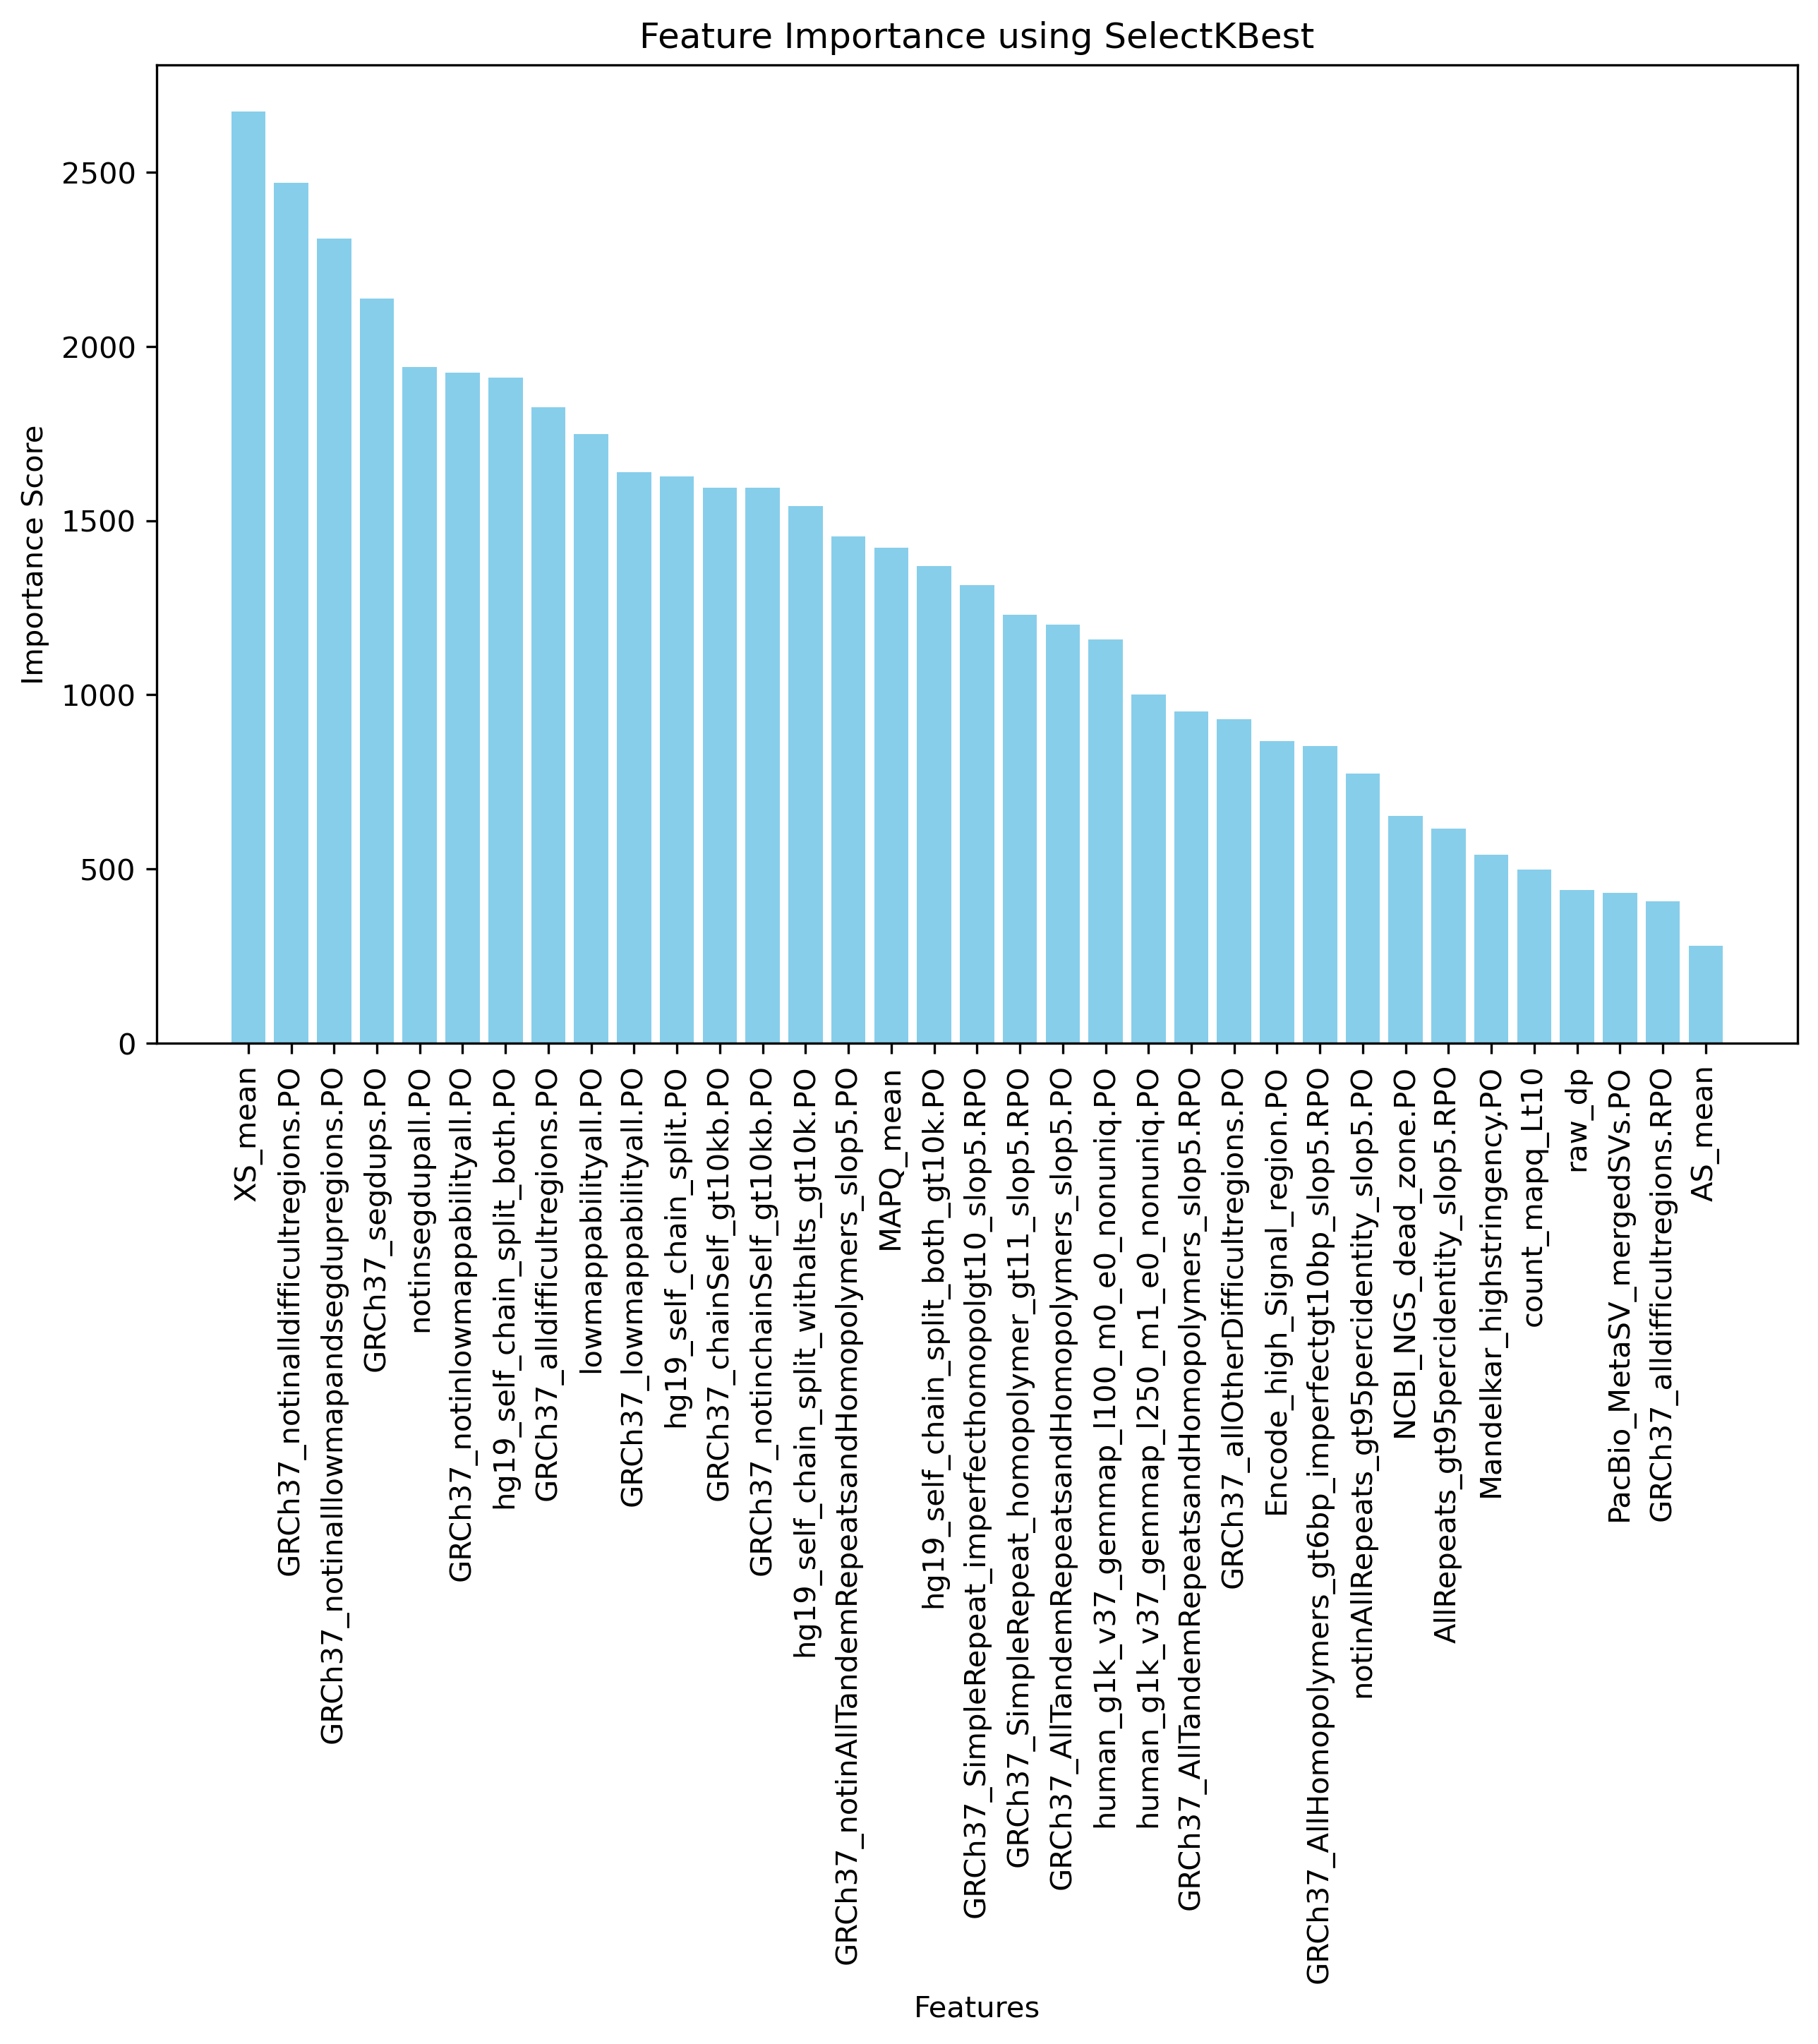

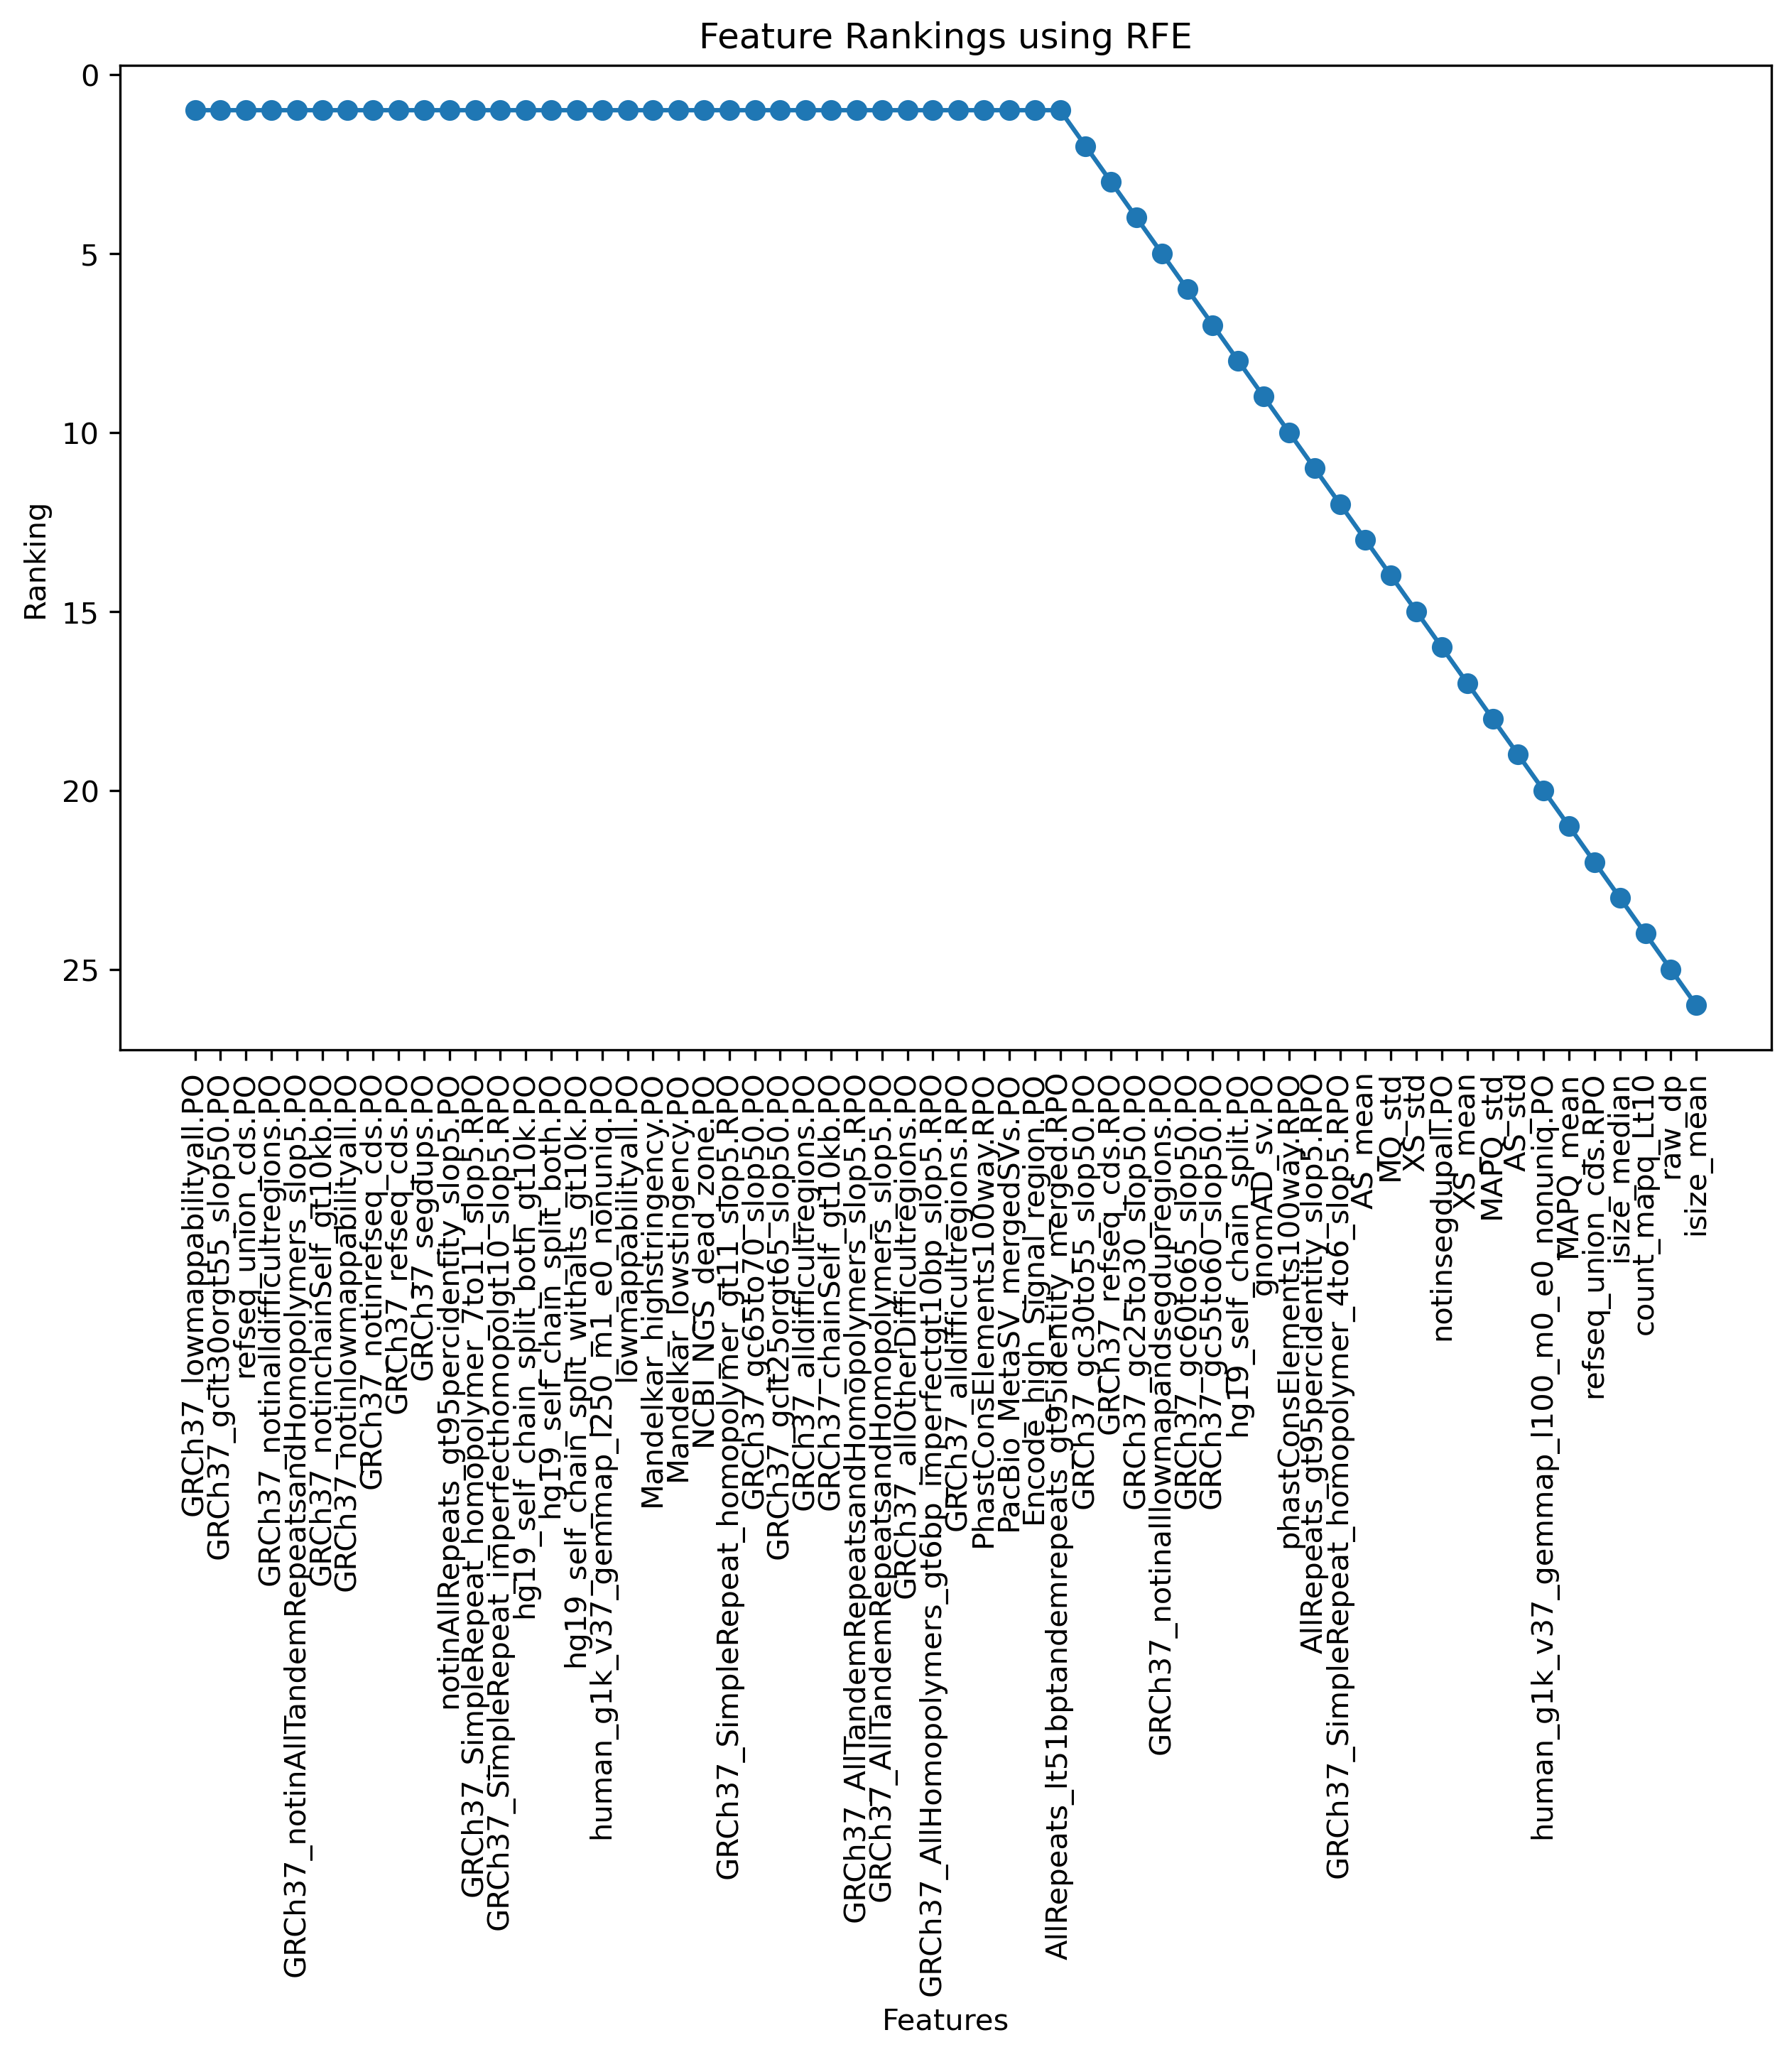

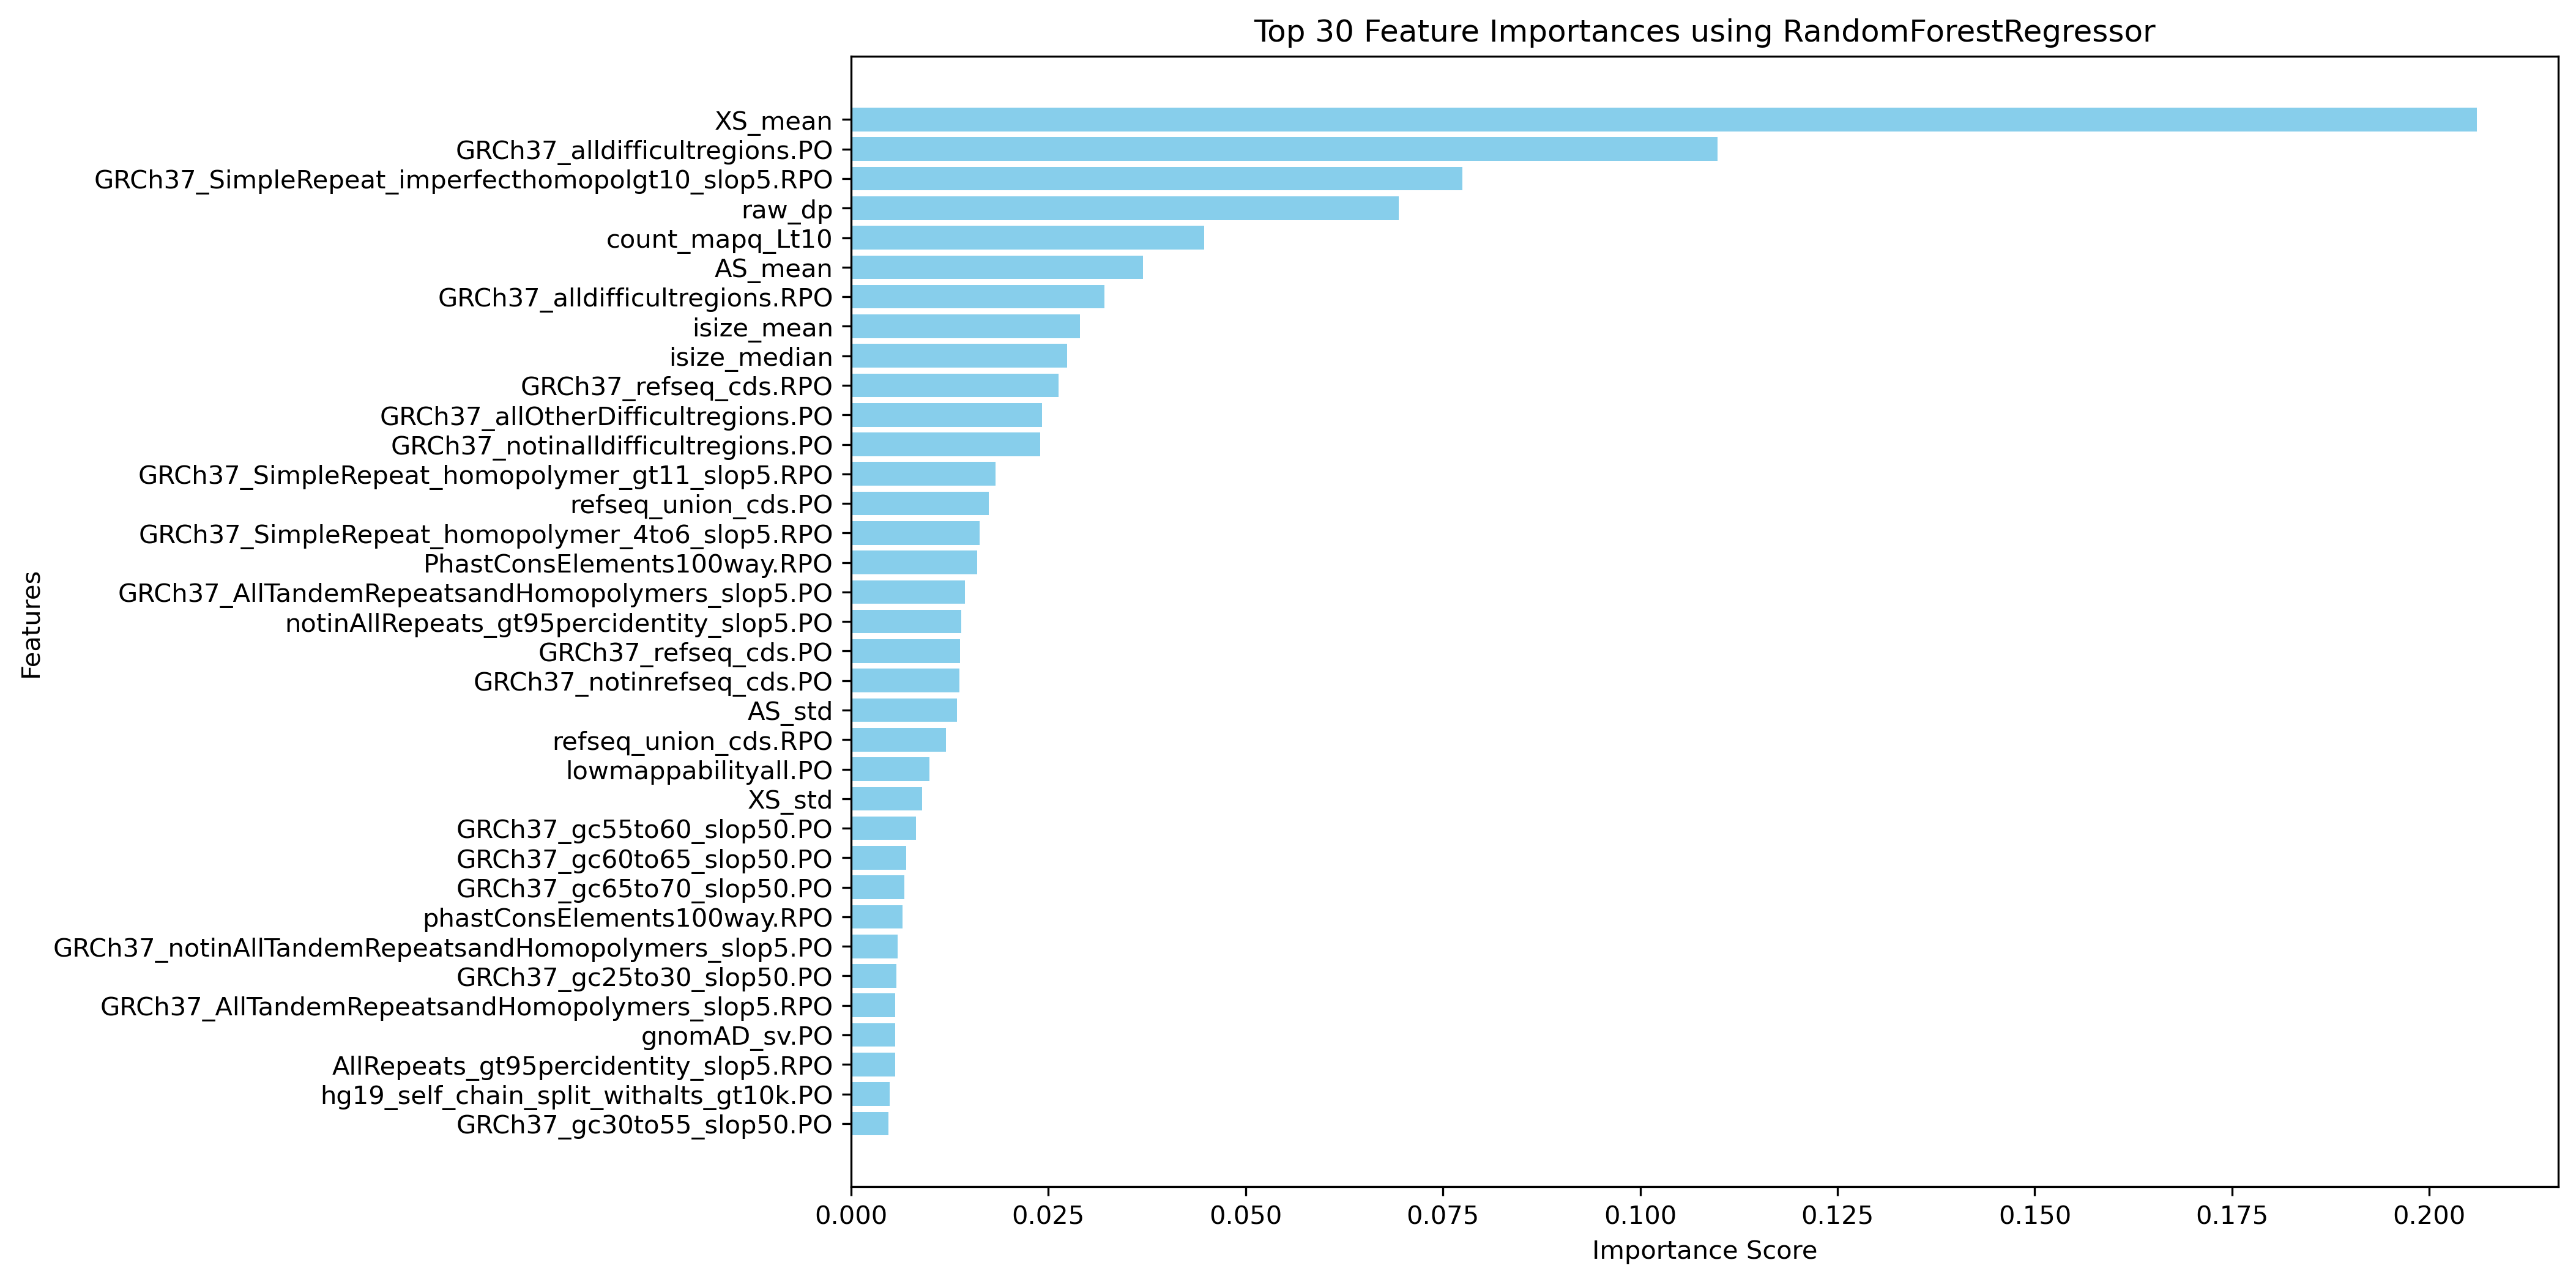

In [7]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor

X = data_filtered_df
y = labels

selector_unvi = SelectKBest(score_func=f_regression, k=35)
X_new = selector_unvi.fit_transform(X, y)
feature_indices = selector_unvi.get_support(indices=True)
features_selected = data_filtered_df.columns[feature_indices]
scores = selector_unvi.scores_

selected_features_scores = {feature: scores[idx] for feature, idx in zip(features_selected, feature_indices)}

# Convert the selected features and their scores to a pandas DataFrame for easier plotting
selected_features_df = pd.DataFrame(list(selected_features_scores.items()), columns=['Feature', 'Score'])
selected_features_df = selected_features_df.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(selected_features_df['Feature'], selected_features_df['Score'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance using SelectKBest')
plt.xticks(rotation=90)
plt.show()

estimator = LinearRegression()
selector_RFE =  RFE(estimator, n_features_to_select=35)
x_new_RFE = selector_RFE.fit_transform(X, y)
feature_indices_RFE = selector_unvi.get_support(indices=True)
features_selected_RFE = data_filtered_df.columns[feature_indices_RFE]
rankings = selector_RFE.ranking_

# Create a DataFrame for features and their rankings
rankings_df = pd.DataFrame({
    'Feature': data_filtered_df.columns,
    'Ranking': rankings
})

# Sort the DataFrame by rankings
rankings_df_sorted = rankings_df.sort_values(by='Ranking')

plt.figure(figsize=(10, 6))
plt.plot(rankings_df_sorted['Feature'], rankings_df_sorted['Ranking'], marker='o', linestyle='-')
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Rankings using RFE')
plt.xticks(rotation=90)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

forest = RandomForestRegressor(n_estimators=100)
forest.fit(X,y)
importances = forest.feature_importances_
top_indexes = importances.argsort()[::-1]
k=35
top_importances = importances[top_indexes[:k]]
top_importances
top_features = data_filtered_df.columns[top_indexes[:k]]

# Create a DataFrame for top features and their importances
top_features_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': top_importances
})

# Plot the top 30 features
plt.figure(figsize=(12, 8))
plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 30 Feature Importances using RandomForestRegressor')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

In [21]:
top_features_select_df = pd.merge(rankings_df_sorted, top_features_df, on='Feature')
top_features_select_df = pd.merge(top_features_select_df, selected_features_df, on='Feature')
features_to_keep = top_features_select_df.Feature.tolist()

features_to_keep = ['GRCh37_notinalldifficultregions.PO',
 'GRCh37_notinAllTandemRepeatsandHomopolymers_slop5.PO',
 'notinAllRepeats_gt95percidentity_slop5.PO',
 'GRCh37_SimpleRepeat_imperfecthomopolgt10_slop5.RPO',
 'lowmappabilityall.PO',
 'GRCh37_SimpleRepeat_homopolymer_gt11_slop5.RPO',
 'GRCh37_alldifficultregions.PO',
 'GRCh37_AllTandemRepeatsandHomopolymers_slop5.RPO',
 'GRCh37_AllTandemRepeatsandHomopolymers_slop5.PO',
 'GRCh37_allOtherDifficultregions.PO',
 'GRCh37_alldifficultregions.RPO',
 'AllRepeats_gt95percidentity_slop5.RPO',
 'AS_mean',
 'XS_mean',
 'count_mapq_Lt10',
 'raw_dp']

data_filtered_df = data_filtered_df[features_to_keep]
data_filtered_labels_df = data_filtered_df.copy()
data_filtered_labels_df['labels'] = labels
data_filtered_labels_df

GRCh37_notinalldifficultregions.PO  \
0                                   1.000   
1                                   0.742   
2                                   0.000   
3                                   1.000   
4                                   1.000   
...                                   ...   
11355                               0.296   
11356                               1.000   
11357                               0.000   
11358                               1.000   
11359                               0.000   

       GRCh37_notinAllTandemRepeatsandHomopolymers_slop5.PO  \
0                                                  1.000      
1                                                  0.742      
2                                                  1.000      
3                                                  1.000      
4                                                  1.000      
...                                                  ...      
11355                                              0.296      
11356                                              1.000      
11357                                              1.000      
11358                                              1.000      
11359                                              1.000      

       notinAllRepeats_gt95percidentity_slop5.PO  \
0                                          1.000   
1                                          1.000   
2                                          0.417   
3                                          1.000   
4                                          1.000   
...                                          ...   
11355                                      0.296   
11356                                      1.000   
11357                                      1.000   
11358                                      1.000   
11359                                      1.000   

       GRCh37_SimpleRepeat_imperfecthomopolgt10_slop5.RPO  \
0                                                    0.0    
1                                                    0.0    
2                                                    0.0    
3                                                    0.0    
4                                                    0.0    
...                                                  ...    
11355                                                0.0    
11356                                                0.0    
11357                                                0.0    
11358                                                0.0    
11359                                                0.0    

       lowmappabilityall.PO  GRCh37_SimpleRepeat_homopolymer_gt11_slop5.RPO  \
0                       0.0                                             0.0   
1                       0.0                                             0.0   
2                       0.0                                             0.0   
3                       0.0                                             0.0   
4                       0.0                                             0.0   
...                     ...                                             ...   
11355                   0.0                                             0.0   
11356                   0.0                                             0.0   
11357                   0.0                                             0.0   
11358                   0.0                                             0.0   
11359                   0.5                                             0.0   

       GRCh37_alldifficultregions.PO  \
0                              0.000   
1                              0.258   
2                              1.000   
3                              0.000   
4                              0.000   
...                              ...   
11355                          0.408   
11356                          0.000   
11357                          1.000   
11

In [92]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
categorical_features = ['labels']

# Fit the model to your data (assuming data_filtered_df is your dataset)
#ctgan.fit(data_filtered_labels_df, categorical_features, epochs=800)



Gen. (-0.80) | Discrim. (0.17): 100%|█████████████████████████████████████████████████████| 800/800 [42:26<00:00,  3.18s/it]


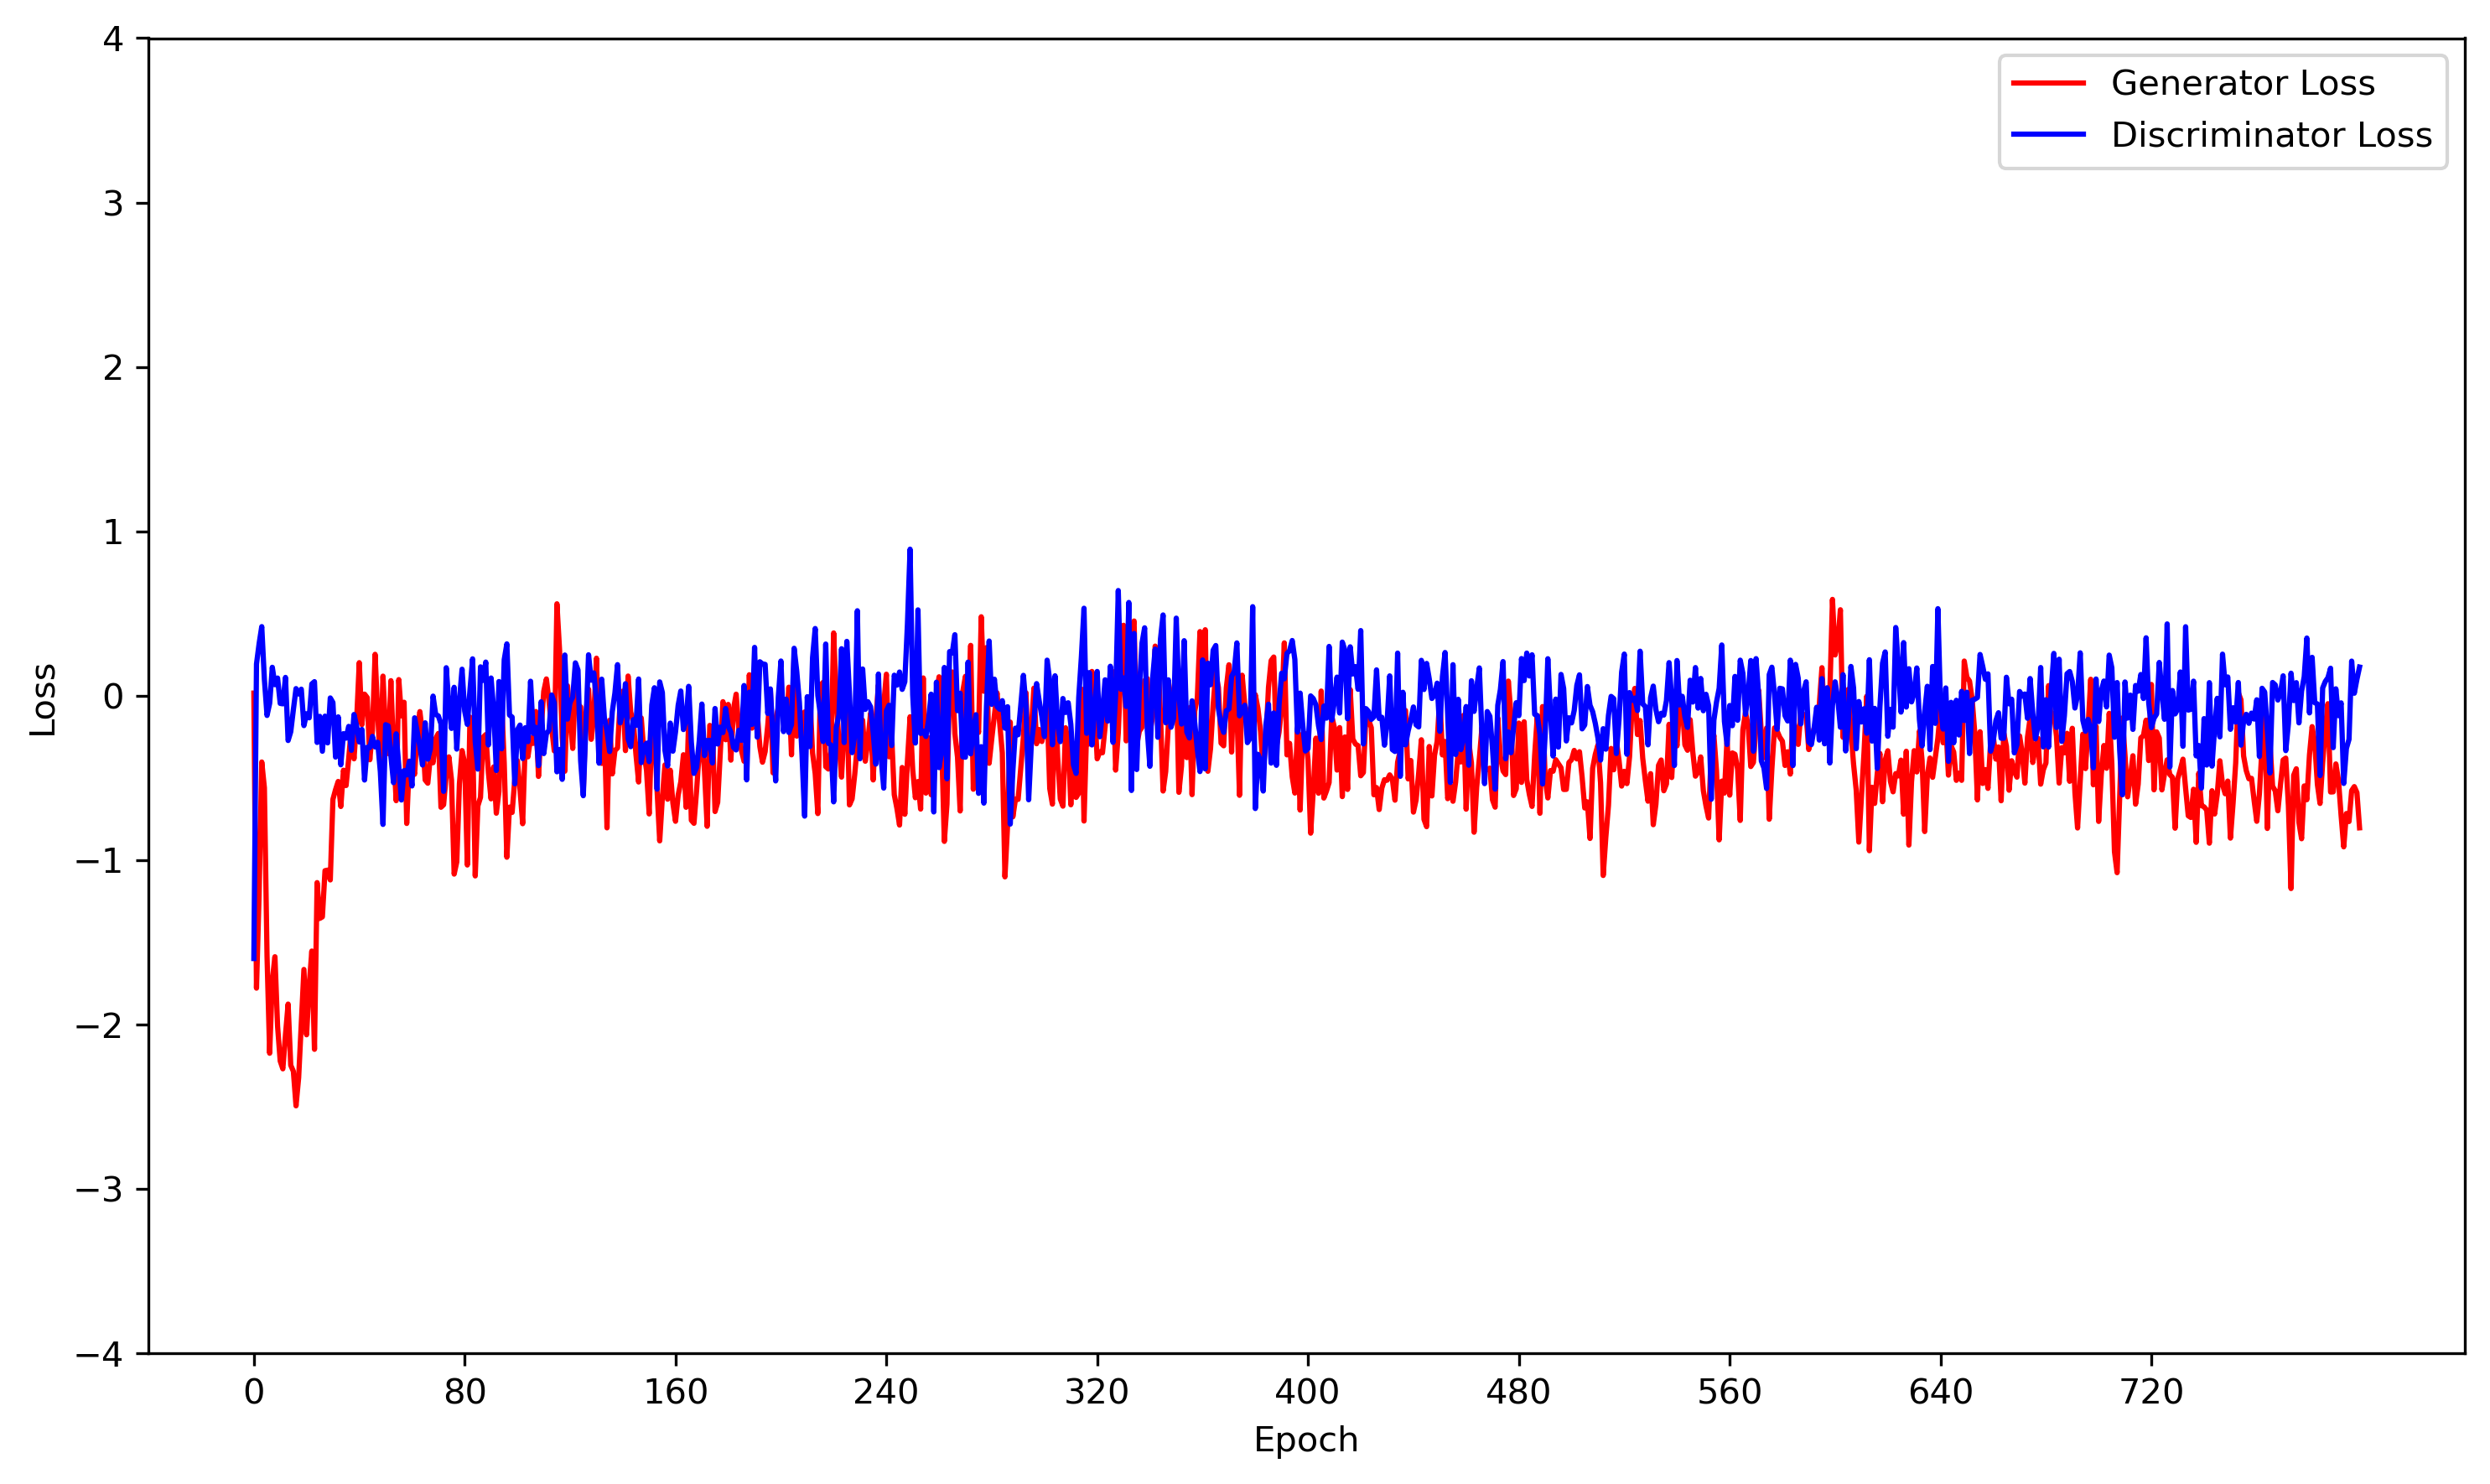

<Figure size 1920x1440 with 0 Axes>

In [141]:
ctgan_loss_df = ctgan.loss_values
ctgan_loss_df.columns = ['epochs', 'generator_loss', 'discriminator_loss']
plt.figure(figsize=(10, 6))

# Generator Loss plot
plt.plot(ctgan_loss_df.epochs, ctgan_loss_df.generator_loss, label='Generator Loss', color='red')

# Discriminator Loss plot
plt.plot(ctgan_loss_df.epochs, ctgan_loss_df.discriminator_loss, label='Discriminator Loss', color='blue')

# Adding labels and title
#plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.xticks(ctgan_loss_df.epochs)

spacing = max(1, len(ctgan_loss_df.epochs) // 10)  # Adjust this value as needed
xticks_positions = np.arange(0, len(ctgan_loss_df.epochs), spacing)

plt.xticks(xticks_positions)
plt.yticks([-4.0, -3.0, -2.0,  -1.0, 0.0,
            1.0, 2.0, 3.0, 4.0])  # Setting y-axis ticks from -2.0 to 2.0
plt.legend()
#plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.savefig('CT_GAN_loss_curves.png', dpi=300)

# Show plot
plt.show()

In [126]:

synthetic_data = ctgan.sample(10000)



In [12]:
#synthetic_data_df = pd.DataFrame(synthetic_data)
#print(synthetic_data_df.columns)
#synthetic_data_df.labels.value_counts()
#synthetic_data_df = synthetic_data_df.reset_index(drop=True)
#synthetic_data_df.to_json('output.json', orient='records', lines=True)
synthetic_data_df = pd.read_json("output.json", lines=True)
synthetic_data_df

#synthetic_data_df.to_csv("synthetic_data.tsv", index=None, sep='\t')
synthetic_data_nolabels_df = synthetic_data_df.iloc[:, :-1] 
synthetic_data_labels = synthetic_data_df.labels



In [17]:
from sklearn.manifold import TSNE
data_combine_df = pd.concat([data_filtered_df, synthetic_data_nolabels_df], axis=0)
combined_labels = ['Real'] * len(data_filtered_df) + ['Synthetic'] * len(synthetic_data_nolabels_df)
data_combine_df = data_combine_df.dropna(axis=1, how='any')
data_combine_df
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_combine_df)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Data'] = combined_labels

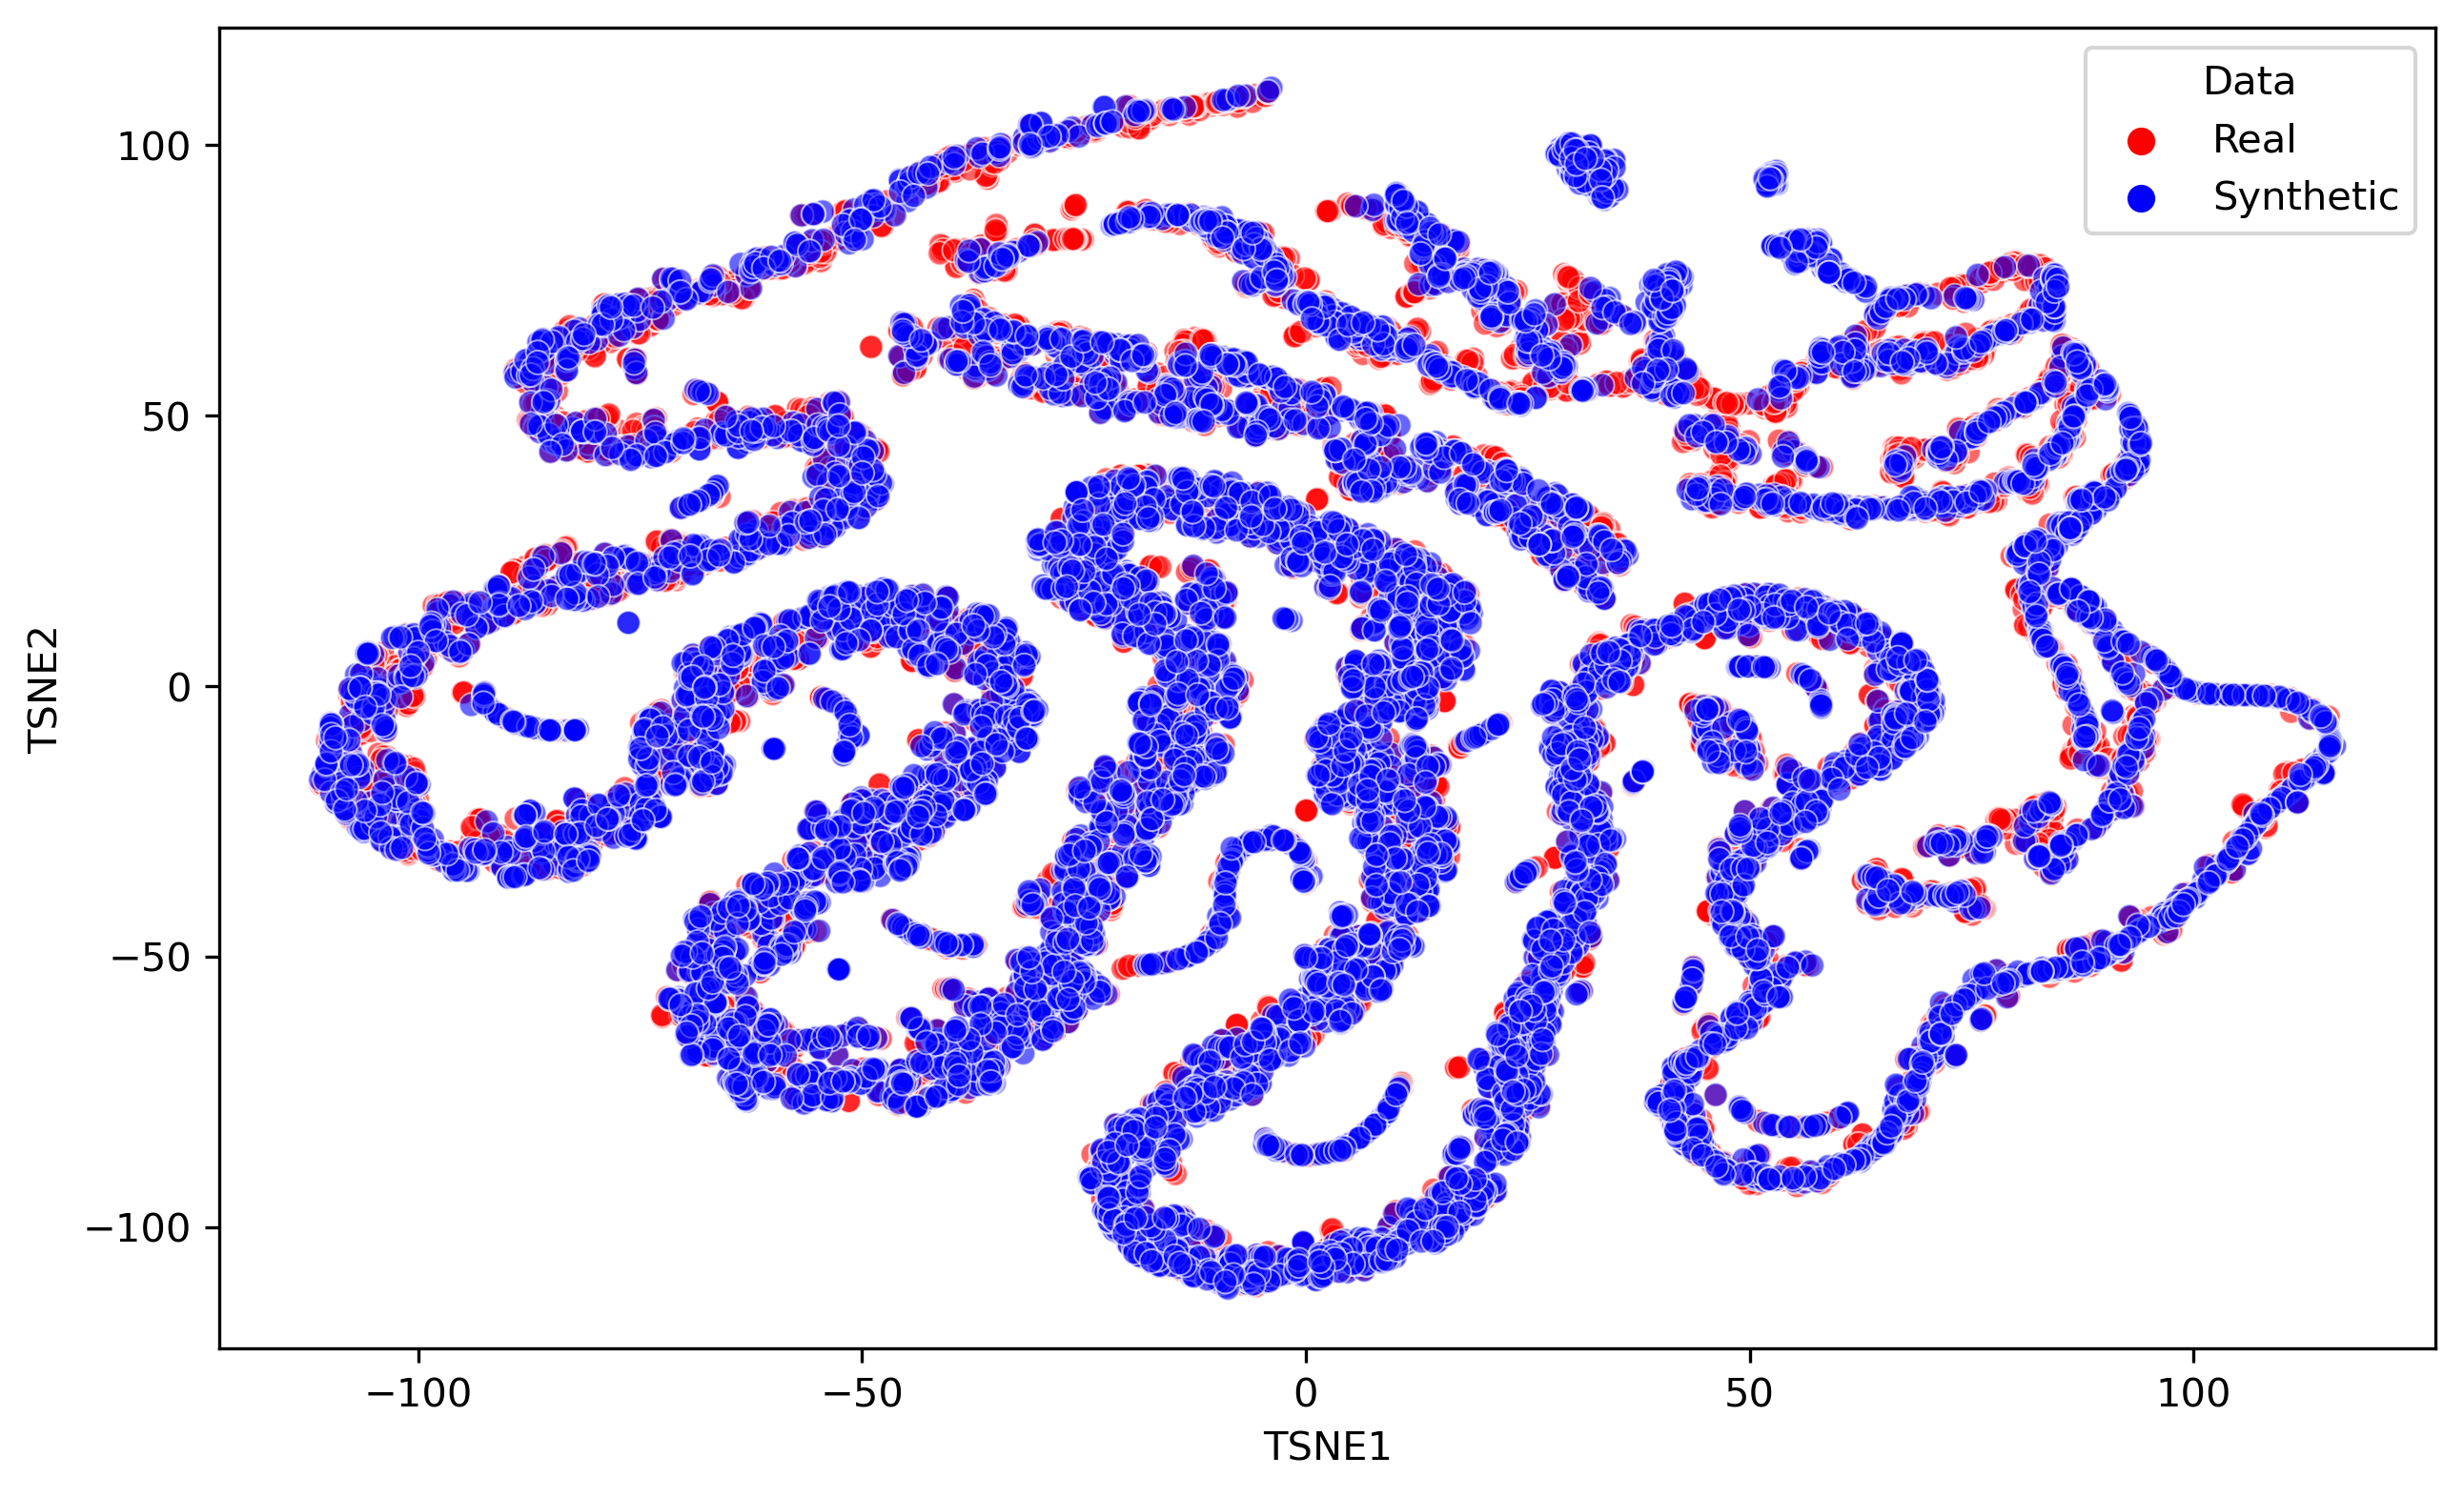

<Figure size 1920x1440 with 0 Axes>

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Data',
    data=tsne_df,
    alpha=0.6,
    palette=['red', 'blue'] 
)
#plt.title('t-SNE of Real and Synthetic Data')
plt.show()
plt.savefig('TSNE_synthetic_real.png', dpi=300)

In [22]:
#Transform the data for learning
def preprocess_data(df, labels, test_size=0.3, val_size=0.1, random_state=42):
    min_max_scaler = preprocessing.MinMaxScaler()
    scaled_df = pd.DataFrame(min_max_scaler.fit_transform(df.values),
                              columns=df.columns, index=df.index)

    X = scaled_df.values
    y = labels.values
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X, y, X_train, X_test, y_train, y_test, min_max_scaler

data_filtered_df
X, y, X_train,  X_test, y_train, y_test, scaler = preprocess_data(data_filtered_df, labels)
print("Number of samples in training set:", len(X_train))
print("Number of samples in testing set:", len(X_test))

X_syn, y_syn, X_syn_train,  X_syn_test, y_syn_train, y_syn_test, scaler = preprocess_data(synthetic_data_nolabels_df, synthetic_data_labels)
print("Number of samples in training set:", len(X_syn_train))
print("Number of samples in testing set:", len(X_syn_test))

X_combined_train = np.concatenate((X_train, X_syn_train), axis=0)
y_combined_train = np.concatenate((y_train, y_syn_train), axis=0)

# Combine the original and synthetic testing sets
X_combined_test = np.concatenate((X_test, X_syn_test), axis=0)
y_combined_test = np.concatenate((y_test, y_syn_test), axis=0)

print("Number of samples in combined training set:", len(X_combined_train))
print("Number of samples in combined testing set:", len(X_combined_test))

Number of samples in training set: 7952
Number of samples in testing set: 3408
Number of samples in training set: 7000
Number of samples in testing set: 3000
Number of samples in combined training set: 14952
Number of samples in combined testing set: 6408


In [23]:
class TabbPN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TabbPN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

    
def calculate_auc_with_ci(y_true, y_pred_proba, n_bootstrap=1000):
    aucs = []
    pr_aucs = []
    
    for _ in range(n_bootstrap):
        idx = np.random.choice(len(y_true), size=len(y_true), replace=True)
        sample_true = np.array(y_true)[idx]
        sample_pred_proba = np.array(y_pred_proba)[idx]
        
        auc = roc_auc_score(sample_true, sample_pred_proba)
        aucs.append(auc)
        
        pr_auc = average_precision_score(sample_true, sample_pred_proba)
        pr_aucs.append(pr_auc)

    auc_mean = np.mean(aucs)
    auc_ci = np.percentile(aucs, [2.5, 97.5])  # Use percentile for CI calculation
    
    pr_auc_mean = np.mean(pr_aucs)
    pr_auc_ci = np.percentile(pr_aucs, [2.5, 97.5])  # Use percentile for CI calculation

    return auc_mean, auc_ci, pr_auc_mean, pr_auc_ci


# Preprocess data using TabbPN
def preprocess_tabular_data(data, labels):
    # Assuming TabbPN preprocessing steps here
    X_processed = data  # Replace this with TabbPN preprocessing
    y = labels.values
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Train TabbPN model
def train_tabular_model(X_train, y_train, input_size, hidden_size, output_size, num_epochs=100, lr=0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = TabbPN(input_size, hidden_size, output_size).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            loss.backward()
            optimizer.step()

    return model

def train_and_evaluate_tabular_model(X_train, y_train, X_test, y_test, hidden_size=8, output_size=1, n_bootstrap=1000):
    input_size = X_train.shape[1]
    tabbpn_model = train_tabular_model(X_train, y_train, input_size, hidden_size, output_size)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    X_test_tensor = torch.FloatTensor(X_test).to(device)
    tabbpn_model.eval()
    with torch.no_grad():
        y_pred_proba = tabbpn_model(X_test_tensor).cpu().numpy().flatten()

    rnn_auc, rnn_auc_ci, rnn_pr_auc, rnn_pr_auc_ci = calculate_auc_with_ci(y_test, y_pred_proba, n_bootstrap)
    print("TabbPN AUC:", rnn_auc, "with CI:", rnn_auc_ci)
    
    return rnn_auc, rnn_auc_ci, rnn_pr_auc, rnn_pr_auc_ci


/projects/wangc/rohan/miniconda3/envs/thesis/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


TabbPN AUC: 0.8820315164219985 with CI: [0.86954136 0.89366068]
Random Forest AUC: 0.9391663150365211 with CI: [0.93026525 0.94702053]
XGBoost AUC: 0.9448200727351157 with CI: [0.93783778 0.95205207]
SVM AUC: 0.882575930914556 with CI: [0.86912866 0.89501081]
MLP AUC: 0.8932052629422959 with CI: [0.88111753 0.9047224 ]
Naive Bayes AUC: 0.8549489134515748 with CI: [0.84181045 0.86861716]
Neural Network AUC: 0.8820315164219985 with CI: [0.86954136 0.89366068]


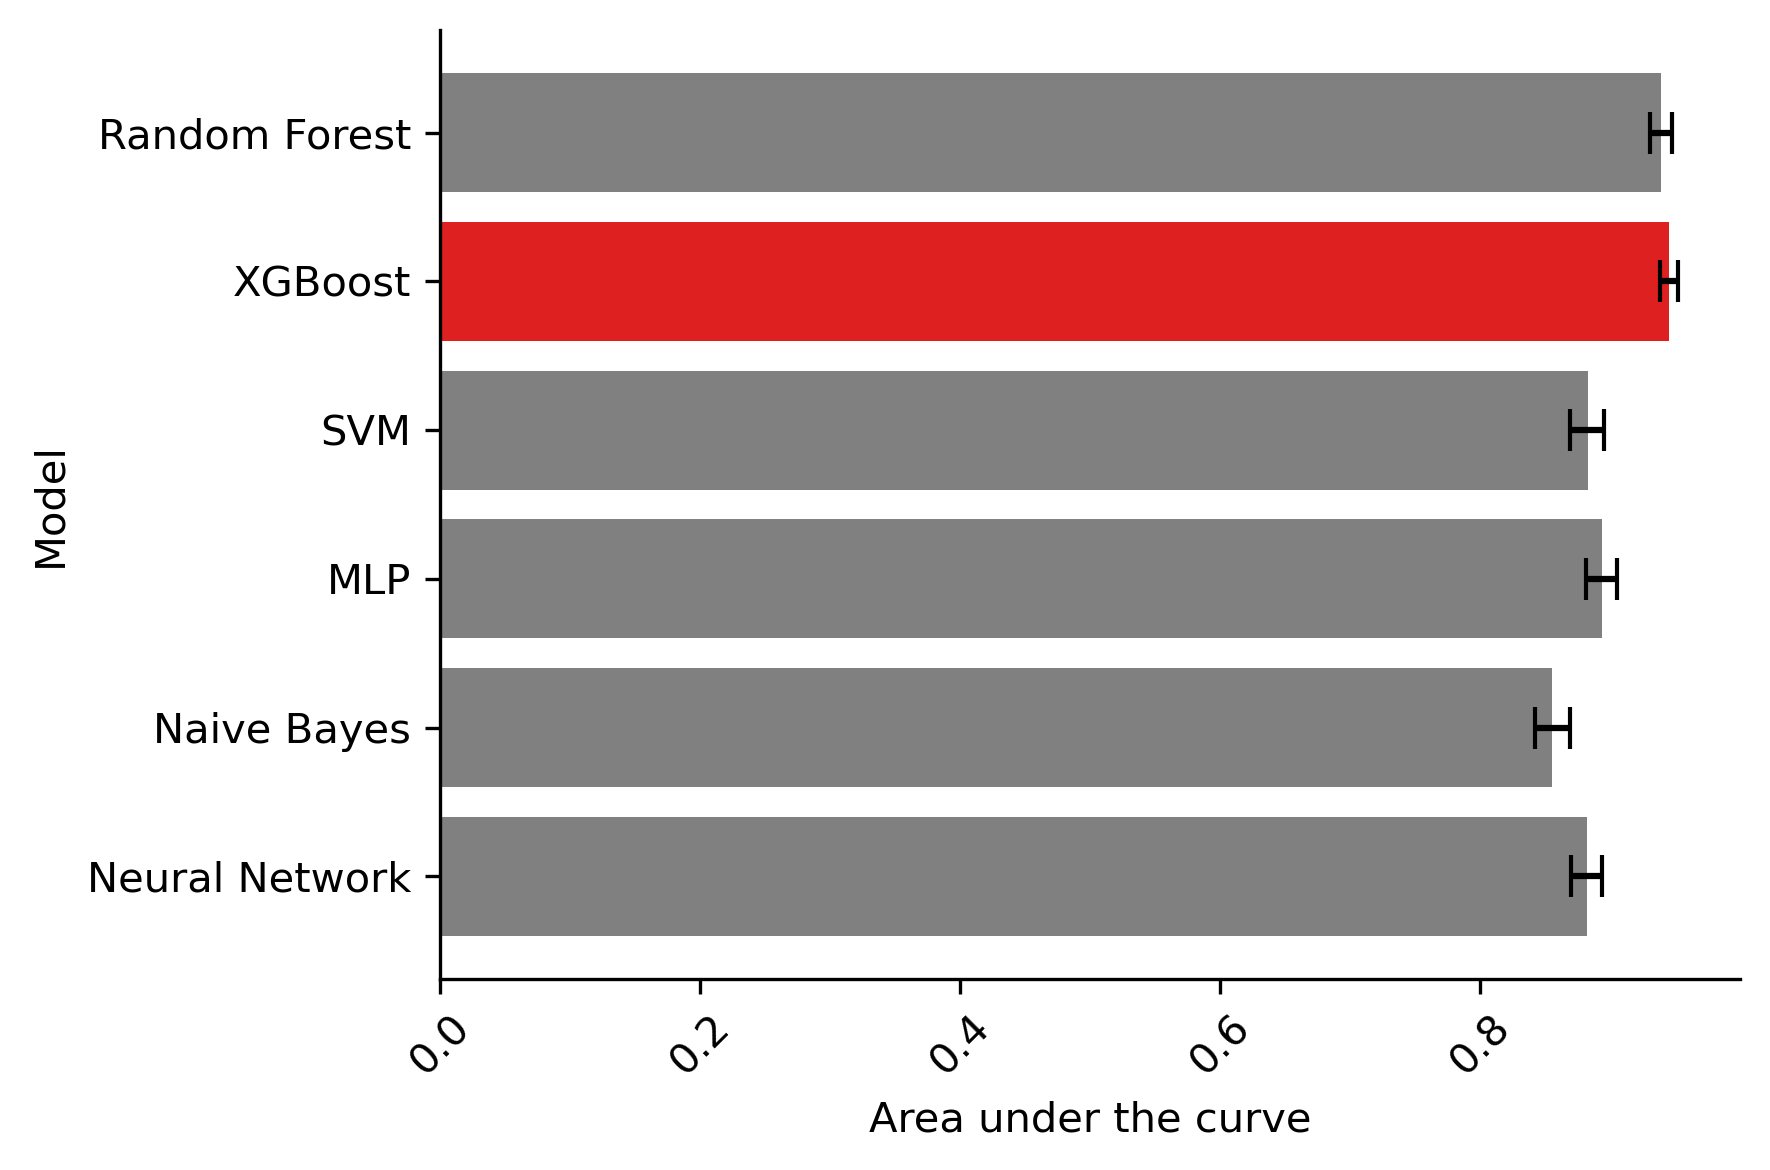

In [28]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_syn_train, y_syn_train)
rf_pred_proba = rf_model.predict_proba(X_syn_test)[:, 1]
rf_auc, rf_auc_ci, rf_pr_auc, rf_pr_auc_ci = calculate_auc_with_ci(y_syn_test, rf_pred_proba)

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_syn_train, y_syn_train)
xgb_pred_proba = xgb_model.predict_proba(X_syn_test)[:, 1]
xgb_auc, xgb_auc_ci, xgb_pr_auc, xgb_pr_auc_ci = calculate_auc_with_ci(y_syn_test, xgb_pred_proba)

# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_syn_train, y_syn_train)
svm_pred_proba = svm_model.predict_proba(X_syn_test)[:, 1]
svm_auc, svm_auc_ci, svm_pr_auc, svm_pr_auc_ci = calculate_auc_with_ci(y_syn_test, svm_pred_proba)

# MLP
mlp_model = MLPClassifier()
mlp_model.fit(X_syn_train, y_syn_train)
mlp_pred_proba = mlp_model.predict_proba(X_syn_test)[:, 1]
mlp_auc, mlp_auc_ci, mlp_pr_auc, mlp_pr_auc_ci = calculate_auc_with_ci(y_syn_test, mlp_pred_proba)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_syn_train, y_syn_train)
nb_pred_proba = nb_model.predict_proba(X_syn_test)[:, 1]
nb_auc, nb_auc_ci, nb_pr_auc, nb_pr_auc_ci = calculate_auc_with_ci(y_syn_test, nb_pred_proba)


rnn_auc, rnn_auc_ci, rnn_pr_auc, rnn_pr_auc_ci = train_and_evaluate_tabular_model(X_syn_train, y_syn_train, X_syn_test, y_syn_test)

# Print AUC and AUC CI for each model
print("Random Forest AUC:", rf_auc, "with CI:", rf_auc_ci)
print("XGBoost AUC:", xgb_auc, "with CI:", xgb_auc_ci)
print("SVM AUC:", svm_auc, "with CI:", svm_auc_ci)
print("MLP AUC:", mlp_auc, "with CI:", mlp_auc_ci)
print("Naive Bayes AUC:", nb_auc, "with CI:", nb_auc_ci)
print("Neural Network AUC:", rnn_auc, "with CI:", rnn_auc_ci)

# Create a DataFrame
models = ['Random Forest', 'XGBoost', 'SVM', 'MLP', 'Naive Bayes', 'Neural Network']
auc_values = [rf_auc, xgb_auc, svm_auc, mlp_auc, nb_auc, rnn_auc]
auc_ci_low = [auc - ci[0] for auc, ci in zip(auc_values, [rf_auc_ci, xgb_auc_ci, svm_auc_ci, mlp_auc_ci, nb_auc_ci, rnn_auc_ci])]
auc_ci_high = [ci[1] - auc for auc, ci in zip(auc_values, [rf_auc_ci, xgb_auc_ci, svm_auc_ci, mlp_auc_ci, nb_auc_ci, rnn_auc_ci])]

auc_df = pd.DataFrame({
    'Model': models,
    'AUC': auc_values,
    'AUC_CI_low': auc_ci_low,
    'AUC_CI_high': auc_ci_high
})

colors = ["grey"] * len(auc_df)
colors[auc_df[auc_df["Model"] == "XGBoost"].index[0]] = "red"

# Create barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=auc_df, y='Model', x='AUC', ci=None, palette=colors)

# Add AUC values at the tips of the bars
#for i, (auc, model) in enumerate(zip(auc_df['AUC'], auc_df['Model'])):
#    ax.text(auc, i, f'{auc:.3f}', va='center')

# Add confidence intervals with error bars
auc_values = auc_df['AUC'].values
auc_ci_low = auc_df['AUC_CI_low'].values
auc_ci_high = auc_df['AUC_CI_high'].values
#plt.errorbar(y=range(len(auc_df)), x=auc_values, xerr=[auc_values - auc_ci_low, auc_ci_high - auc_values],
#             fmt='none', color='black', capsize=5)
plt.errorbar(y=range(len(models)), x=auc_values,xerr=[auc_ci_low, auc_ci_high], fmt='none', color='black', capsize=5)
# Customize plot
plt.xticks(rotation=45)
plt.xlabel('Area under the curve')
plt.ylabel('Model')
plt.tight_layout()
sns.despine()
plt.savefig('baseline_model_plot.synthetic.png', dpi=400)

/projects/wangc/rohan/miniconda3/envs/thesis/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest AUC: 0.9079691813277497 with CI: [0.89732618 0.91772726]
XGBoost AUC: 0.9077613131557384 with CI: [0.89735887 0.91761565]
SVM AUC: 0.8871390840287562 with CI: [0.87553206 0.89857486]
MLP AUC: 0.9041412026731931 with CI: [0.89398051 0.91451019]
Naive Bayes AUC: 0.8736855710517846 with CI: [0.86111193 0.88575652]
LNN AUC: 0.8820315164219985 with CI: [0.86954136 0.89366068]
TabbPN AUC: 0.891375631223829 with CI: [0.87921377 0.90288415]
Random Forest AUC: 0.9079691813277497 with CI: [0.89732618 0.91772726]
XGBoost AUC: 0.9077613131557384 with CI: [0.89735887 0.91761565]
SVM AUC: 0.8871390840287562 with CI: [0.87553206 0.89857486]
MLP AUC: 0.9041412026731931 with CI: [0.89398051 0.91451019]
Naive Bayes AUC: 0.8736855710517846 with CI: [0.86111193 0.88575652]
Neural Network AUC: 0.891375631223829 with CI: [0.87921377 0.90288415]


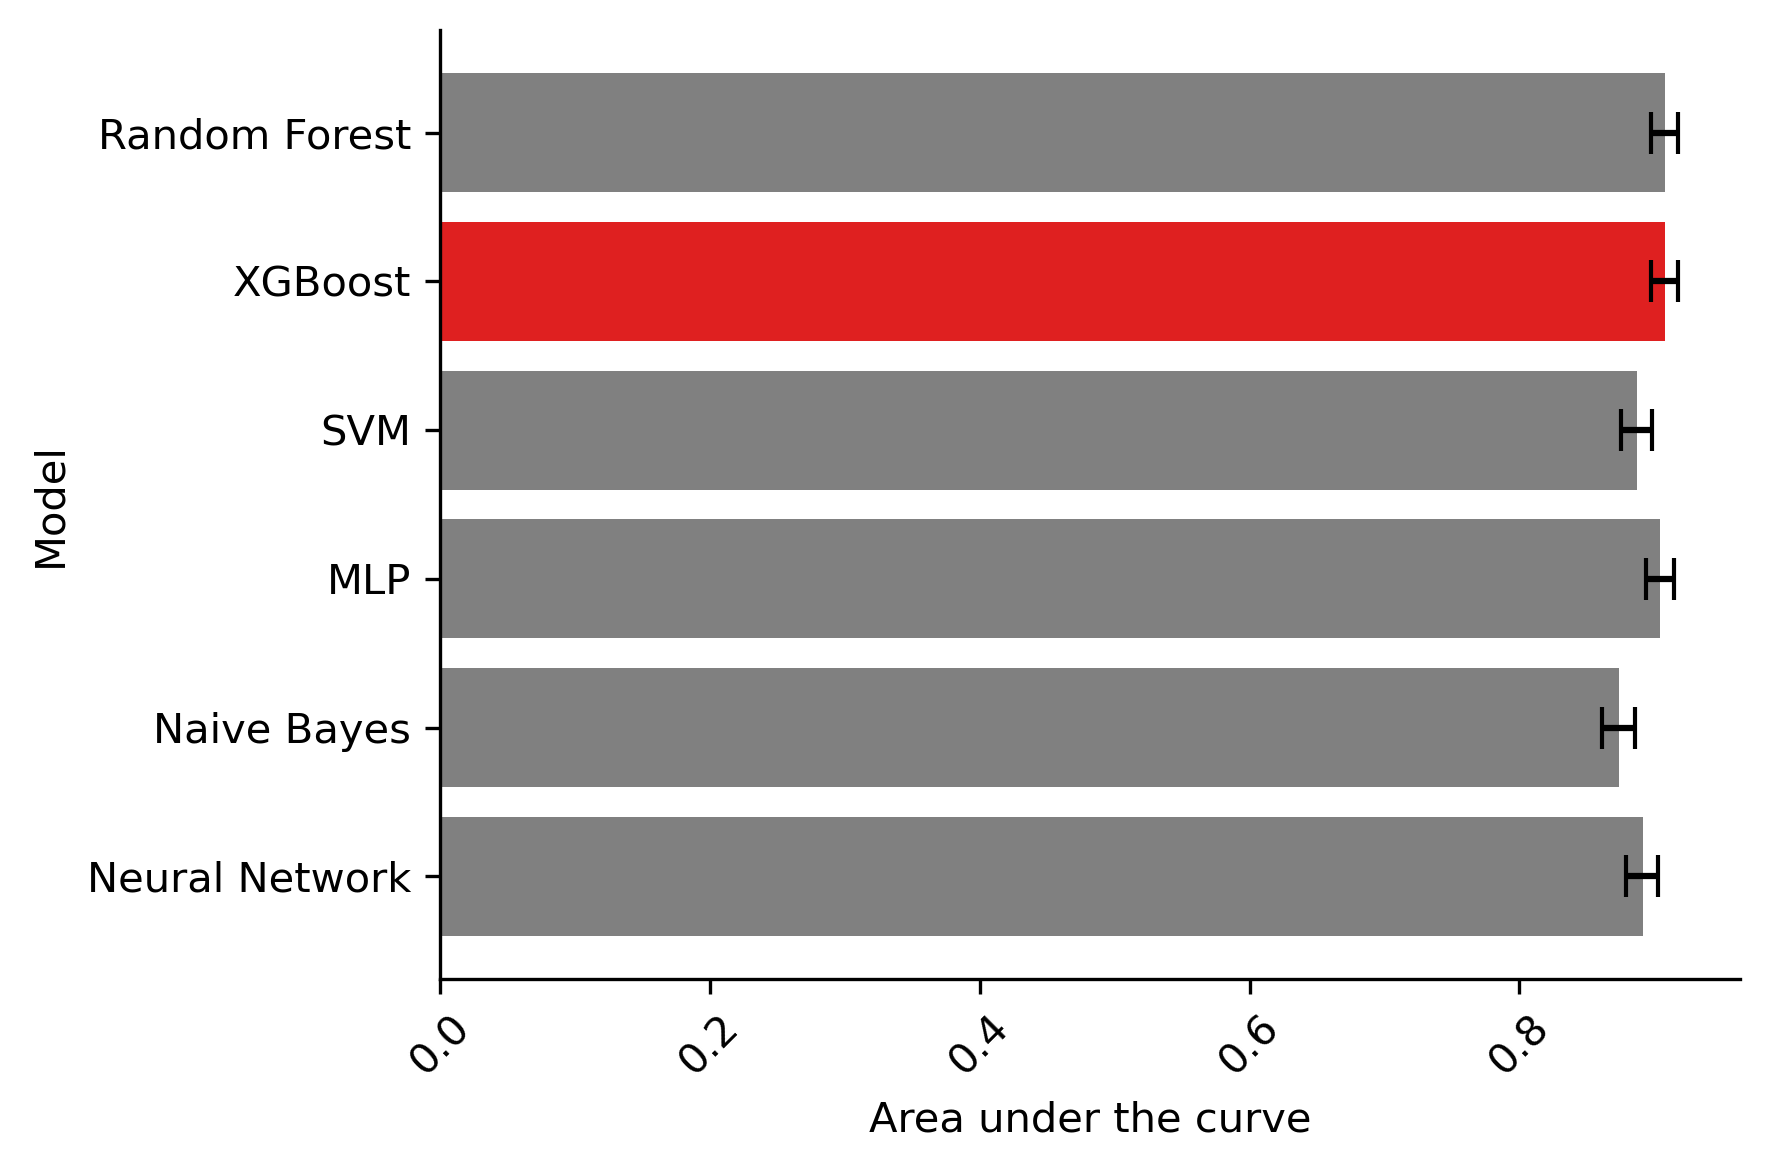

In [29]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
rf_auc, rf_auc_ci, rf_pr_auc, rf_pr_auc_ci = calculate_auc_with_ci(y_test, rf_pred_proba)

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc, xgb_auc_ci, xgb_pr_auc, xgb_pr_auc_ci = calculate_auc_with_ci(y_test, xgb_pred_proba)

# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred_proba = svm_model.predict_proba(X_test)[:, 1]
svm_auc, svm_auc_ci, svm_pr_auc, svm_pr_auc_ci = calculate_auc_with_ci(y_test, svm_pred_proba)

# MLP
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
mlp_auc, mlp_auc_ci, mlp_pr_auc, mlp_pr_auc_ci = calculate_auc_with_ci(y_test, mlp_pred_proba)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred_proba = nb_model.predict_proba(X_test)[:, 1]
nb_auc, nb_auc_ci, nb_pr_auc, nb_pr_auc_ci = calculate_auc_with_ci(y_test, nb_pred_proba)



# Print AUC and AUC CI for each model
print("Random Forest AUC:", rf_auc, "with CI:", rf_auc_ci)
print("XGBoost AUC:", xgb_auc, "with CI:", xgb_auc_ci)
print("SVM AUC:", svm_auc, "with CI:", svm_auc_ci)
print("MLP AUC:", mlp_auc, "with CI:", mlp_auc_ci)
print("Naive Bayes AUC:", nb_auc, "with CI:", nb_auc_ci)
print("LNN AUC:", rnn_auc, "with CI:", rnn_auc_ci)

rnn_auc, rnn_auc_ci, rnn_pr_auc, rnn_pr_auc_ci = train_and_evaluate_tabular_model(X_train, y_train, X_test, y_test)

# Print AUC and AUC CI for each model
print("Random Forest AUC:", rf_auc, "with CI:", rf_auc_ci)
print("XGBoost AUC:", xgb_auc, "with CI:", xgb_auc_ci)
print("SVM AUC:", svm_auc, "with CI:", svm_auc_ci)
print("MLP AUC:", mlp_auc, "with CI:", mlp_auc_ci)
print("Naive Bayes AUC:", nb_auc, "with CI:", nb_auc_ci)
print("Neural Network AUC:", rnn_auc, "with CI:", rnn_auc_ci)

# Create a DataFrame
models = ['Random Forest', 'XGBoost', 'SVM', 'MLP', 'Naive Bayes', 'Neural Network']
auc_values = [rf_auc, xgb_auc, svm_auc, mlp_auc, nb_auc, rnn_auc]
auc_ci_low = [auc - ci[0] for auc, ci in zip(auc_values, [rf_auc_ci, xgb_auc_ci, svm_auc_ci, mlp_auc_ci, nb_auc_ci, rnn_auc_ci])]
auc_ci_high = [ci[1] - auc for auc, ci in zip(auc_values, [rf_auc_ci, xgb_auc_ci, svm_auc_ci, mlp_auc_ci, nb_auc_ci, rnn_auc_ci])]

auc_df = pd.DataFrame({
    'Model': models,
    'AUC': auc_values,
    'AUC_CI_low': auc_ci_low,
    'AUC_CI_high': auc_ci_high
})


colors = ["grey"] * len(auc_df)
colors[auc_df[auc_df["Model"] == "XGBoost"].index[0]] = "red"

# Create barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=auc_df, y='Model', x='AUC', ci=None, palette=colors)

# Add AUC values at the tips of the bars
#for i, (auc, model) in enumerate(zip(auc_df['AUC'], auc_df['Model'])):
#    ax.text(auc, i, f'{auc:.3f}', va='center')

# Add confidence intervals with error bars
auc_values = auc_df['AUC'].values
auc_ci_low = auc_df['AUC_CI_low'].values
auc_ci_high = auc_df['AUC_CI_high'].values
#plt.errorbar(y=range(len(auc_df)), x=auc_values, xerr=[auc_values - auc_ci_low, auc_ci_high - auc_values],
#             fmt='none', color='black', capsize=5)
plt.errorbar(y=range(len(models)), x=auc_values,xerr=[auc_ci_low, auc_ci_high], fmt='none', color='black', capsize=5)
# Customize plot
plt.xticks(rotation=45)
plt.xlabel('Area under the curve')
plt.ylabel('Model')
plt.tight_layout()
sns.despine()
plt.savefig('baseline_model_plot.real.png', dpi=400)



/projects/wangc/rohan/miniconda3/envs/thesis/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest AUC: 0.9209746655034492 with CI: [0.91397823 0.92793062]
XGBoost AUC: 0.9299462021777962 with CI: [0.92348958 0.93590851]
SVM AUC: 0.8801682248148964 with CI: [0.87148377 0.88862676]
MLP AUC: 0.8953102199468025 with CI: [0.88701946 0.90324545]
Naive Bayes AUC: 0.8602319267339116 with CI: [0.85099974 0.86926598]
LNN AUC: 0.891375631223829 with CI: [0.87921377 0.90288415]
TabbPN AUC: 0.8843007965869949 with CI: [0.87569129 0.89288662]
Random Forest AUC: 0.9209746655034492 with CI: [0.91397823 0.92793062]
XGBoost AUC: 0.9299462021777962 with CI: [0.92348958 0.93590851]
SVM AUC: 0.8801682248148964 with CI: [0.87148377 0.88862676]
MLP AUC: 0.8953102199468025 with CI: [0.88701946 0.90324545]
Naive Bayes AUC: 0.8602319267339116 with CI: [0.85099974 0.86926598]
Neural Network AUC: 0.8843007965869949 with CI: [0.87569129 0.89288662]


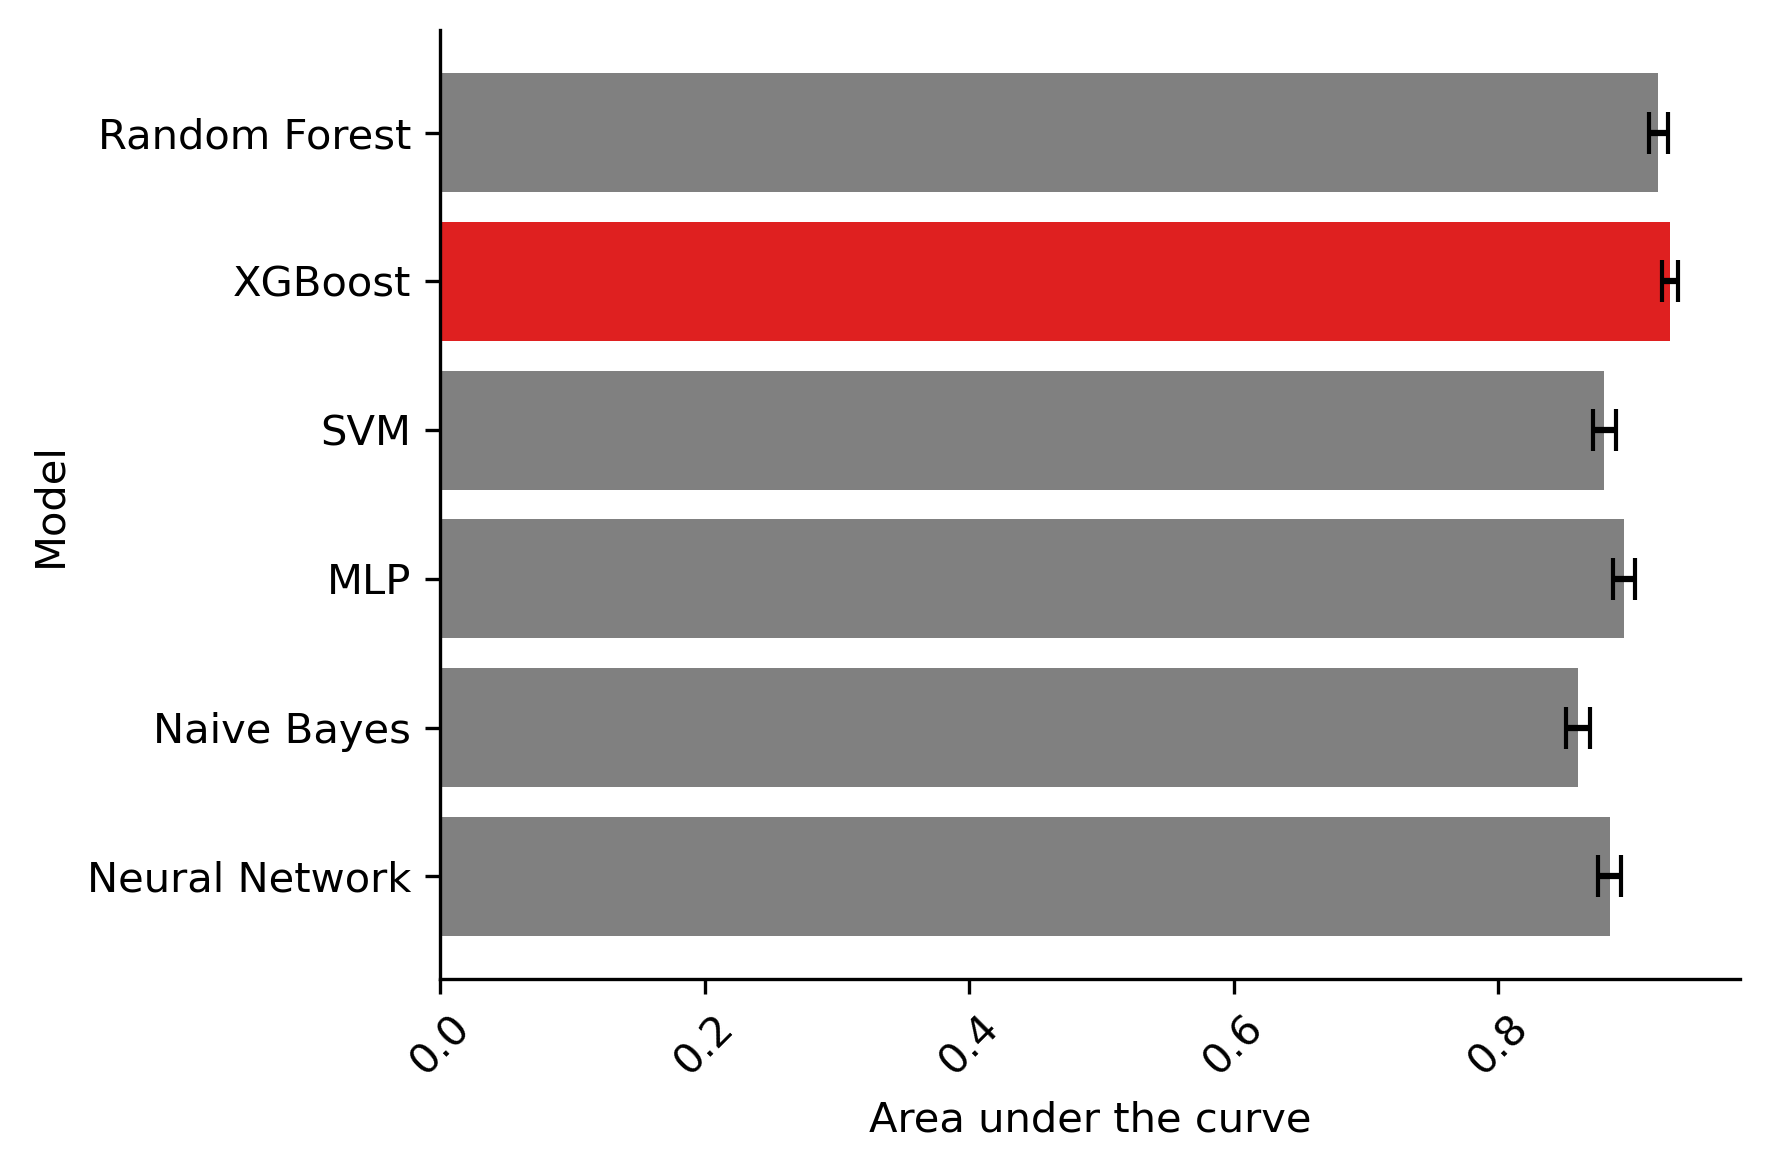

In [30]:
rf_model = RandomForestClassifier()
rf_model.fit(X_combined_train, y_combined_train)
rf_pred_proba = rf_model.predict_proba(X_combined_test)[:, 1]
rf_auc, rf_auc_ci, rf_pr_auc, rf_pr_auc_ci = calculate_auc_with_ci(y_combined_test, rf_pred_proba)

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_combined_train, y_combined_train)
xgb_pred_proba = xgb_model.predict_proba(X_combined_test)[:, 1]
xgb_auc, xgb_auc_ci, xgb_pr_auc, xgb_pr_auc_ci = calculate_auc_with_ci(y_combined_test, xgb_pred_proba)

# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_combined_train, y_combined_train)
svm_pred_proba = svm_model.predict_proba(X_combined_test)[:, 1]
svm_auc, svm_auc_ci, svm_pr_auc, svm_pr_auc_ci = calculate_auc_with_ci(y_combined_test, svm_pred_proba)

# MLP
mlp_model = MLPClassifier()
mlp_model.fit(X_combined_train, y_combined_train)
mlp_pred_proba = mlp_model.predict_proba(X_combined_test)[:, 1]
mlp_auc, mlp_auc_ci, mlp_pr_auc, mlp_pr_auc_ci = calculate_auc_with_ci(y_combined_test, mlp_pred_proba)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_combined_train, y_combined_train)
nb_pred_proba = nb_model.predict_proba(X_combined_test)[:, 1]
nb_auc, nb_auc_ci, nb_pr_auc, nb_pr_auc_ci = calculate_auc_with_ci(y_combined_test, nb_pred_proba)



# Print AUC and AUC CI for each model
print("Random Forest AUC:", rf_auc, "with CI:", rf_auc_ci)
print("XGBoost AUC:", xgb_auc, "with CI:", xgb_auc_ci)
print("SVM AUC:", svm_auc, "with CI:", svm_auc_ci)
print("MLP AUC:", mlp_auc, "with CI:", mlp_auc_ci)
print("Naive Bayes AUC:", nb_auc, "with CI:", nb_auc_ci)
print("LNN AUC:", rnn_auc, "with CI:", rnn_auc_ci)

rnn_auc, rnn_auc_ci, rnn_pr_auc, rnn_pr_auc_ci = train_and_evaluate_tabular_model(X_combined_train, y_combined_train,
                                                                                  X_combined_test, y_combined_test)

# Print AUC and AUC CI for each model
print("Random Forest AUC:", rf_auc, "with CI:", rf_auc_ci)
print("XGBoost AUC:", xgb_auc, "with CI:", xgb_auc_ci)
print("SVM AUC:", svm_auc, "with CI:", svm_auc_ci)
print("MLP AUC:", mlp_auc, "with CI:", mlp_auc_ci)
print("Naive Bayes AUC:", nb_auc, "with CI:", nb_auc_ci)
print("Neural Network AUC:", rnn_auc, "with CI:", rnn_auc_ci)

# Create a DataFrame
models = ['Random Forest', 'XGBoost', 'SVM', 'MLP', 'Naive Bayes', 'Neural Network']
auc_values = [rf_auc, xgb_auc, svm_auc, mlp_auc, nb_auc, rnn_auc]
auc_ci_low = [auc - ci[0] for auc, ci in zip(auc_values, [rf_auc_ci, xgb_auc_ci, svm_auc_ci, mlp_auc_ci, nb_auc_ci, rnn_auc_ci])]
auc_ci_high = [ci[1] - auc for auc, ci in zip(auc_values, [rf_auc_ci, xgb_auc_ci, svm_auc_ci, mlp_auc_ci, nb_auc_ci, rnn_auc_ci])]

auc_df = pd.DataFrame({
    'Model': models,
    'AUC': auc_values,
    'AUC_CI_low': auc_ci_low,
    'AUC_CI_high': auc_ci_high
})


colors = ["grey"] * len(auc_df)
colors[auc_df[auc_df["Model"] == "XGBoost"].index[0]] = "red"

# Create barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=auc_df, y='Model', x='AUC', ci=None, palette=colors)

# Add AUC values at the tips of the bars
#for i, (auc, model) in enumerate(zip(auc_df['AUC'], auc_df['Model'])):
#    ax.text(auc, i, f'{auc:.3f}', va='center')

# Add confidence intervals with error bars
auc_values = auc_df['AUC'].values
auc_ci_low = auc_df['AUC_CI_low'].values
auc_ci_high = auc_df['AUC_CI_high'].values
#plt.errorbar(y=range(len(auc_df)), x=auc_values, xerr=[auc_values - auc_ci_low, auc_ci_high - auc_values],
#             fmt='none', color='black', capsize=5)
plt.errorbar(y=range(len(models)), x=auc_values,xerr=[auc_ci_low, auc_ci_high], fmt='none', color='black', capsize=5)
# Customize plot
plt.xticks(rotation=45)
plt.xlabel('Area under the curve')
plt.ylabel('Model')
plt.tight_layout()
sns.despine()
plt.savefig('baseline_model_plot.combined.png', dpi=400)




AUC: 0.9299
Thresh=0.027, n=16, AUC: 0.9299
Thresh=0.028, n=15, AUC: 0.9286
Thresh=0.029, n=14, AUC: 0.9284
Thresh=0.030, n=13, AUC: 0.9275
Thresh=0.030, n=12, AUC: 0.9233
Thresh=0.030, n=11, AUC: 0.9213
Thresh=0.034, n=10, AUC: 0.9114
Thresh=0.039, n=9, AUC: 0.9095
Thresh=0.041, n=8, AUC: 0.9045
Thresh=0.047, n=7, AUC: 0.9032
Thresh=0.060, n=6, AUC: 0.8980
Thresh=0.062, n=5, AUC: 0.8940
Thresh=0.074, n=4, AUC: 0.8827
Thresh=0.076, n=3, AUC: 0.8469
Thresh=0.110, n=2, AUC: 0.8267
Thresh=0.281, n=1, AUC: 0.8008


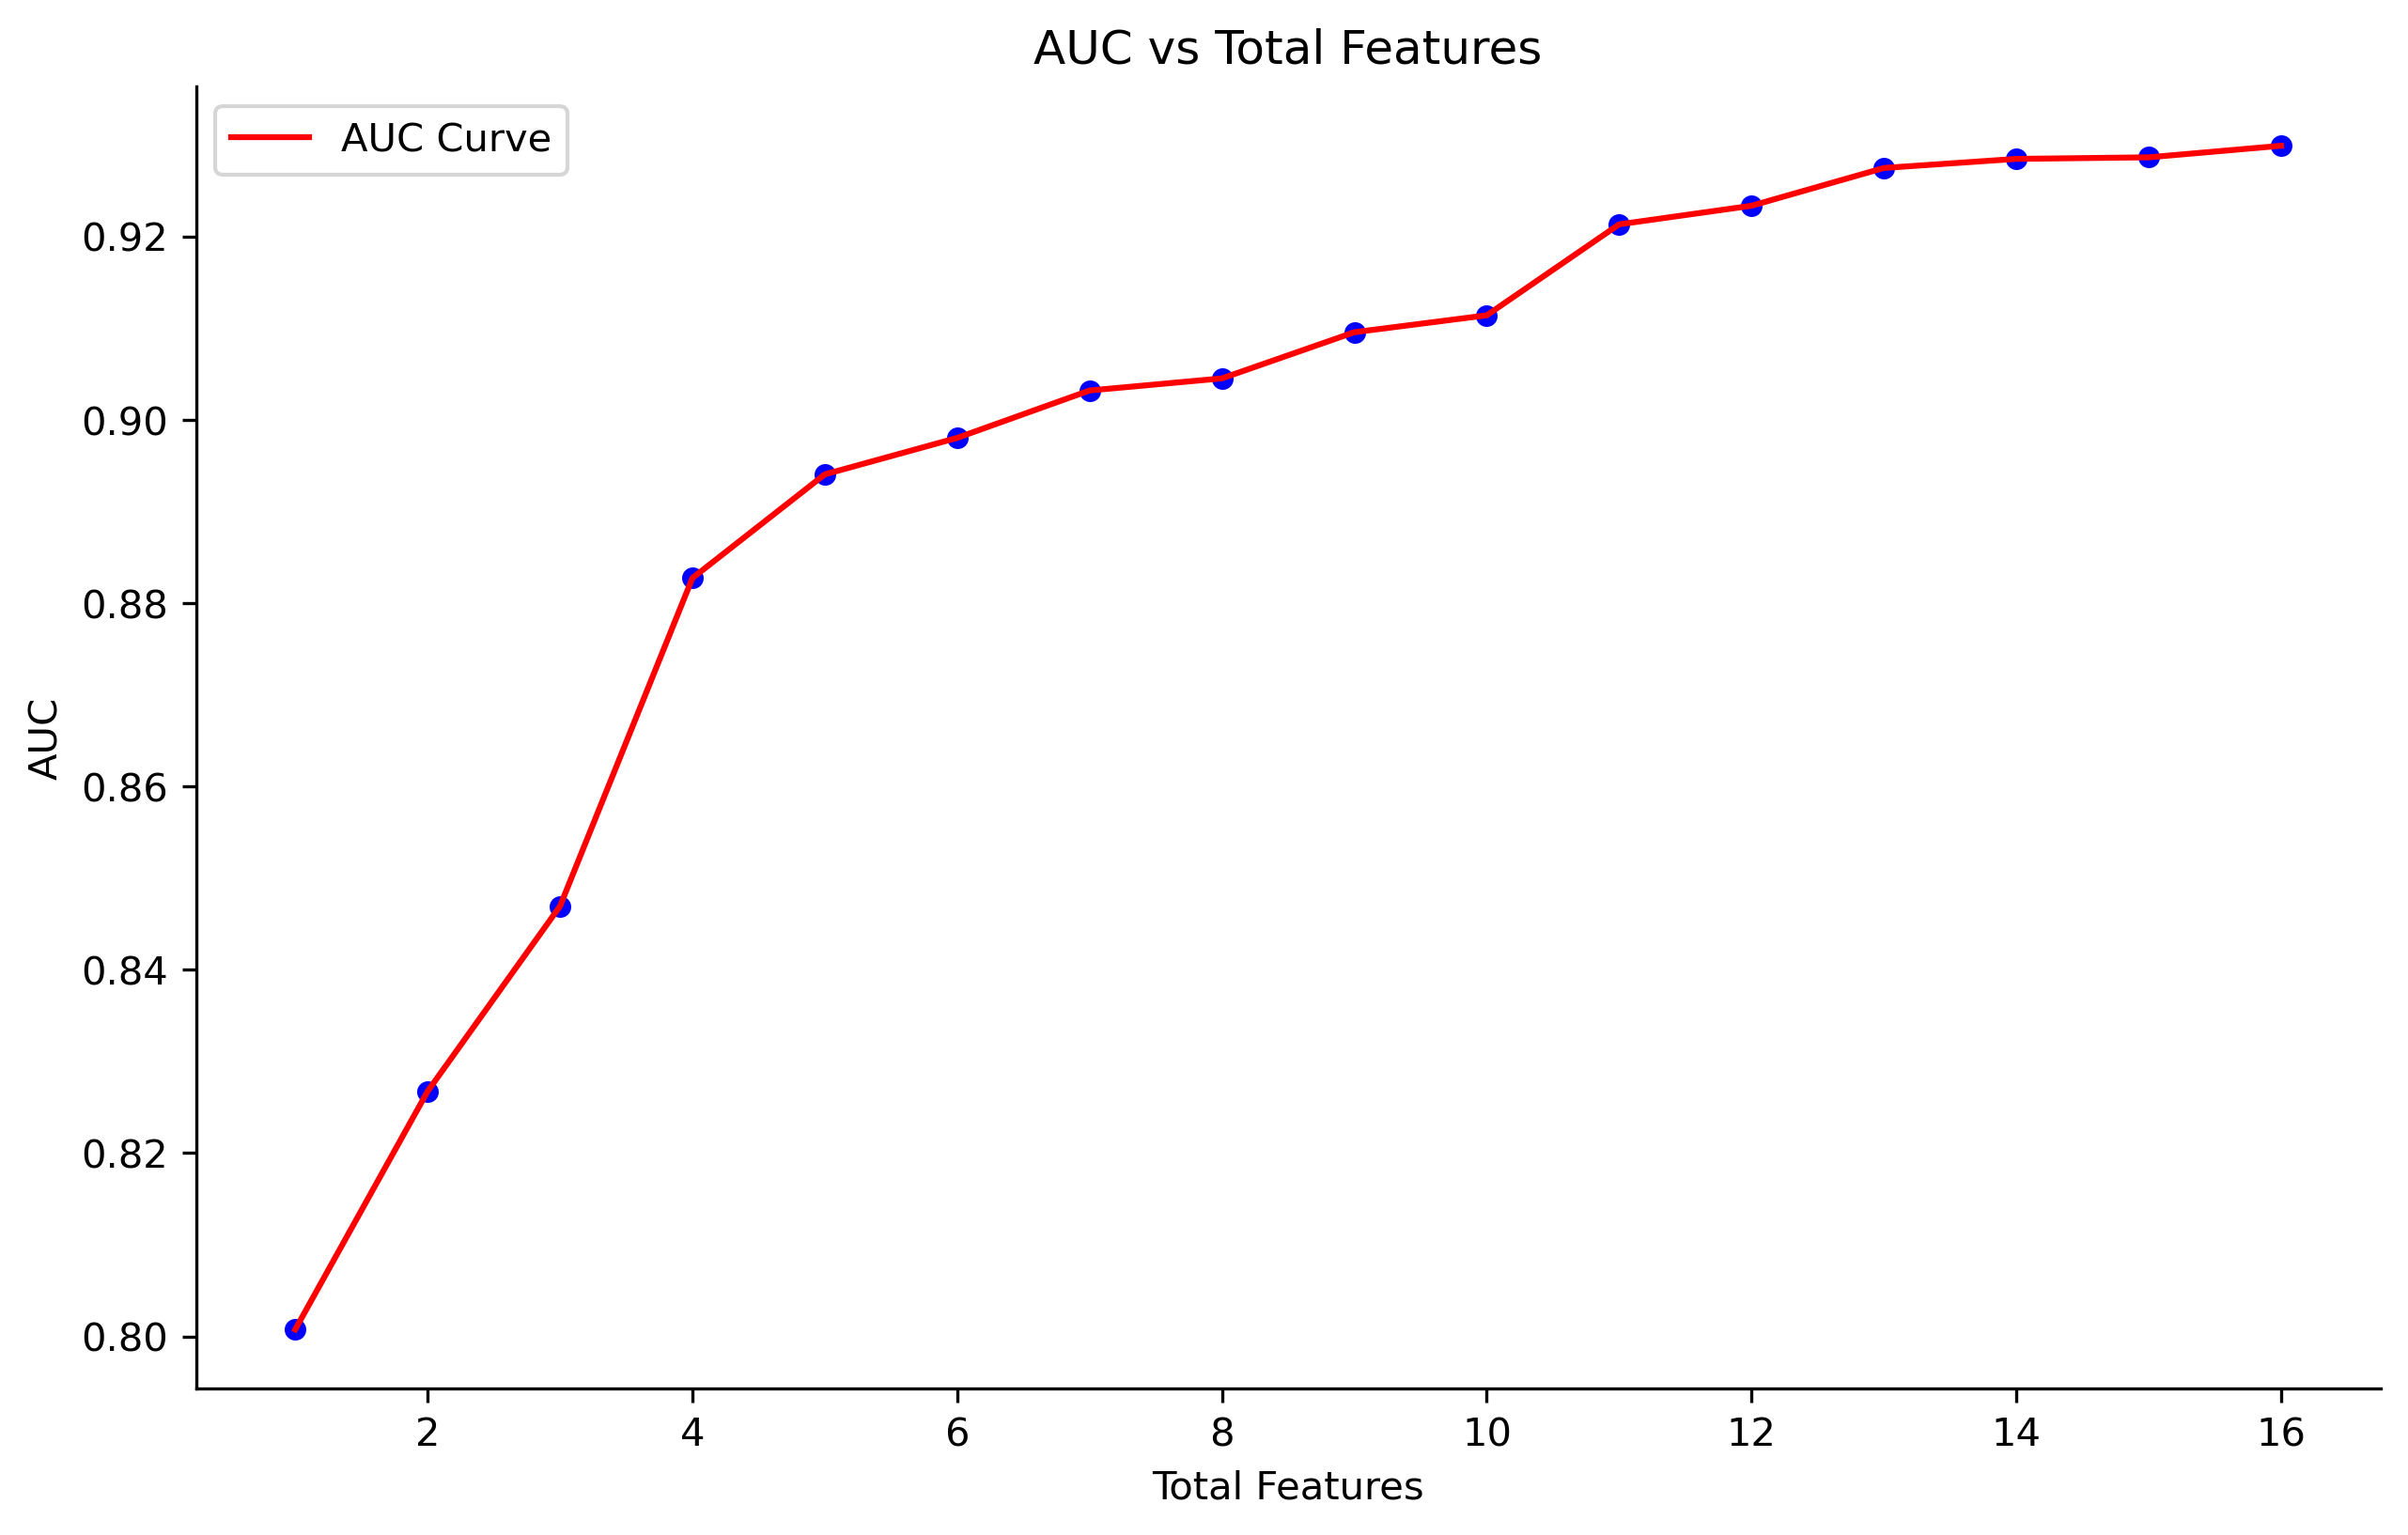

In [31]:
model = XGBClassifier()
model.fit(X_combined_train, y_combined_train)

y_pred_proba = model.predict_proba(X_combined_test)[:, 1]  # Predict probabilities for the positive class
auc = roc_auc_score(y_combined_test, y_pred_proba)

print(f"AUC: {auc:.4f}")

thresholds = np.sort(model.feature_importances_)

#feature_df = pd.DataFrame(columns=['total_features', 'auc'])

feature_dict = {'total_features': [], 'auc': []}

for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_combined_train)
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_combined_train)
    select_X_test = selection.transform(X_combined_test)
    y_pred_proba = selection_model.predict_proba(select_X_test)[:, 1]
    auc = roc_auc_score(y_combined_test, y_pred_proba)
    feature_dict['total_features'].append(select_X_train.shape[1])
    feature_dict['auc'].append(auc)
    #feature_df = feature_df.append({'total_features': select_X_train.shape[1], 'auc': auc}, ignore_index=True)
    print("Thresh=%.3f, n=%d, AUC: %.4f" % (thresh, select_X_train.shape[1], auc))

# Plotting
feature_df = pd.DataFrame(feature_dict)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=feature_df, x='total_features', y='auc', color='blue')
sns.lineplot(data=feature_df, x='total_features', y='auc', color='red')
plt.xlabel('Total Features')
plt.ylabel('AUC')
plt.title('AUC vs Total Features')
plt.legend(['AUC Curve'])
sns.despine()
plt.savefig('top_features_choice_plot.png', dpi=400)
plt.show()

No handles with labels found to put in legend.


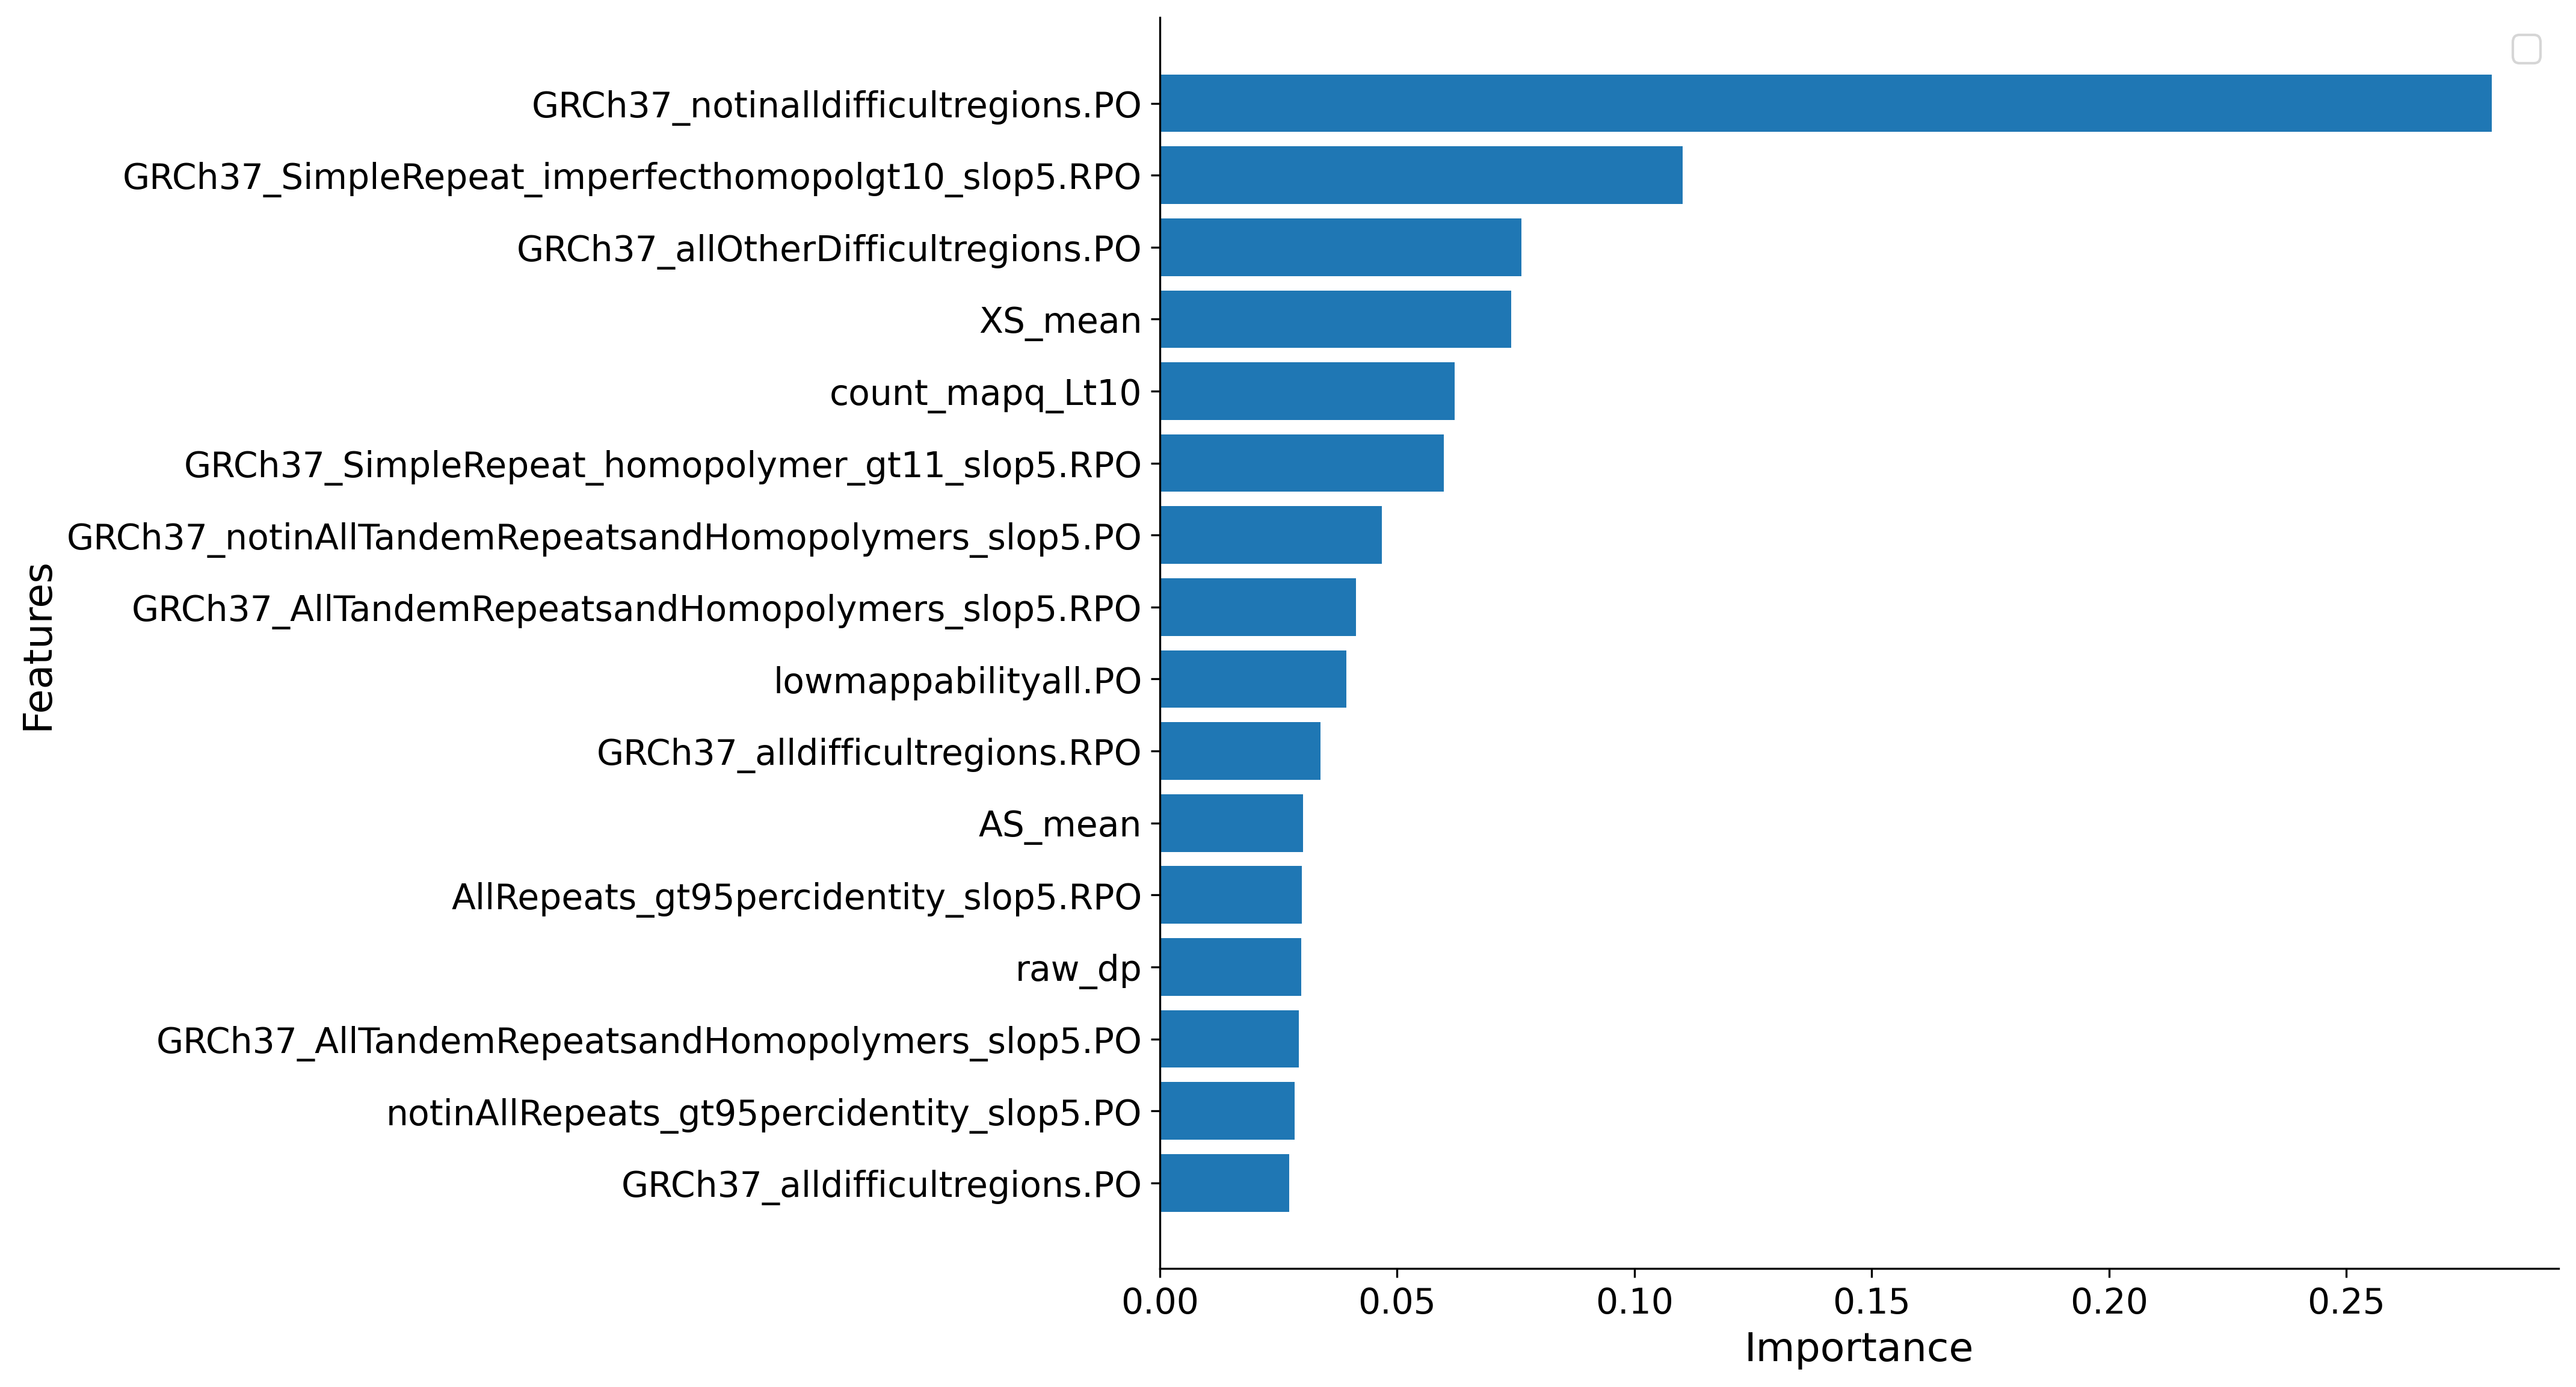

In [32]:

top_indices = np.argsort(model.feature_importances_)[::-1][:17]

# Get the names of the top 26 features based on their indices
top_features = data_filtered_df.columns[top_indices]
cmap = plt.cm.get_cmap('Greys', len(top_features))
# Get the importance scores of the top 26 features
top_importance = model.feature_importances_[top_indices]

# Create a bar plot
plt.figure(figsize=(10, 9))
plt.barh(top_features, top_importance)
#bars = plt.barh(top_features, top_importance, color=[cmap(i) for i in range(len(top_features))])
#plt.xlabel('Importance')
#plt.ylabel('Features')
plt.xlabel('Importance', fontsize=16)  # Adjust fontsize as needed
plt.ylabel('Features', fontsize=16)
#plt.title('Top 26 Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
# Adjust x and y axis labels size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
 # Adjust fontsize as needed
sns.despine()
# Show legend
plt.legend(fontsize=14)
plt.show()

In [33]:
import optuna

results_optuna = []
params_optuna = []

def objective(trial):
    # Define the search space for hyperparameters
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 100),  # Expanded range for max_depth
        'n_estimators': trial.suggest_int('n_estimators', 100, 10000, log=True),  # Log scale for n_estimators
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 250, 350, 10),
        'subsample': trial.suggest_uniform('subsample', 0.7, 0.9),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.001, 0.5),  # Expanded range for learning_rate
        'gamma': trial.suggest_uniform('gamma', 0, 0.5),  # Additional hyperparameter
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-10, 1),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-10, 1),
        'objective': 'binary:logistic',
        'eval_metric': 'auc',  # Use 'auc' for classification task
    }
    
    # Initialize XGBClassifier with current parameters
    model = XGBClassifier(**params)
    cv_scores = cross_val_score(model, X_combined_train, y_combined_train, cv=5, scoring='roc_auc')
    mean_auc = np.mean(cv_scores)
    
    # Store the result for plotting
    results_optuna.append(mean_auc)
    params_optuna.append(params)
    return mean_auc


# Perform optimization with Optuna
study = optuna.create_study(direction='maximize')  # maximize AUC
study.optimize(objective, n_trials=200)  # Adjust n_trials as needed

# Print the best trial and parameters found
print("Best trial:")
best_trial = study.best_trial
print(f"AUC: {best_trial.value:.4f}")
print("Best parameters:")
best_params = best_trial.params
print(best_params)


final_xg_model = XGBClassifier(**best_params)
final_xg_model.fit(X_combined_train, y_combined_train)
joblib.dump(final_xg_model, "best_xgb_model.optuna.joblib")

# Save the best parameters
with open("best_params.json", "w") as f:
    json.dump(best_params, f)

# Save the AUC scores
auc_df = pd.DataFrame({
    'Trial': range(1, len(results_optuna) + 1),
    'Mean AUC': results_optuna,
    'Params': params_optuna
})
auc_df.to_csv("auc_scores.csv", index=False)

print("Best model, parameters, and AUC scores have been saved.")

[I 2024-06-19 13:54:25,573] A new study created in memory with name: no-name-93560b9c-ec36-407b-90bc-453b6c1be161
/tmp/ipykernel_329733/1402175828.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
/tmp/ipykernel_329733/1402175828.py:12: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_child_weight': trial.suggest_int('min_child_weight', 250, 350, 10),
/tmp/ipykernel_329733/1402175828.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 0.9),
/tmp/ipykernel_329733/1402175828.py:14: FutureWarning: sug

Best trial:
AUC: 0.9124
Best parameters:
{'max_depth': 96, 'n_estimators': 5312, 'colsample_bytree': 0.8142076586867489, 'min_child_weight': 250, 'subsample': 0.8895630907731833, 'learning_rate': 0.08239854006830095, 'gamma': 0.23378157810392242, 'reg_alpha': 0.43738957482889534, 'reg_lambda': 4.056513677786368e-09}


NameError: name 'json' is not defined

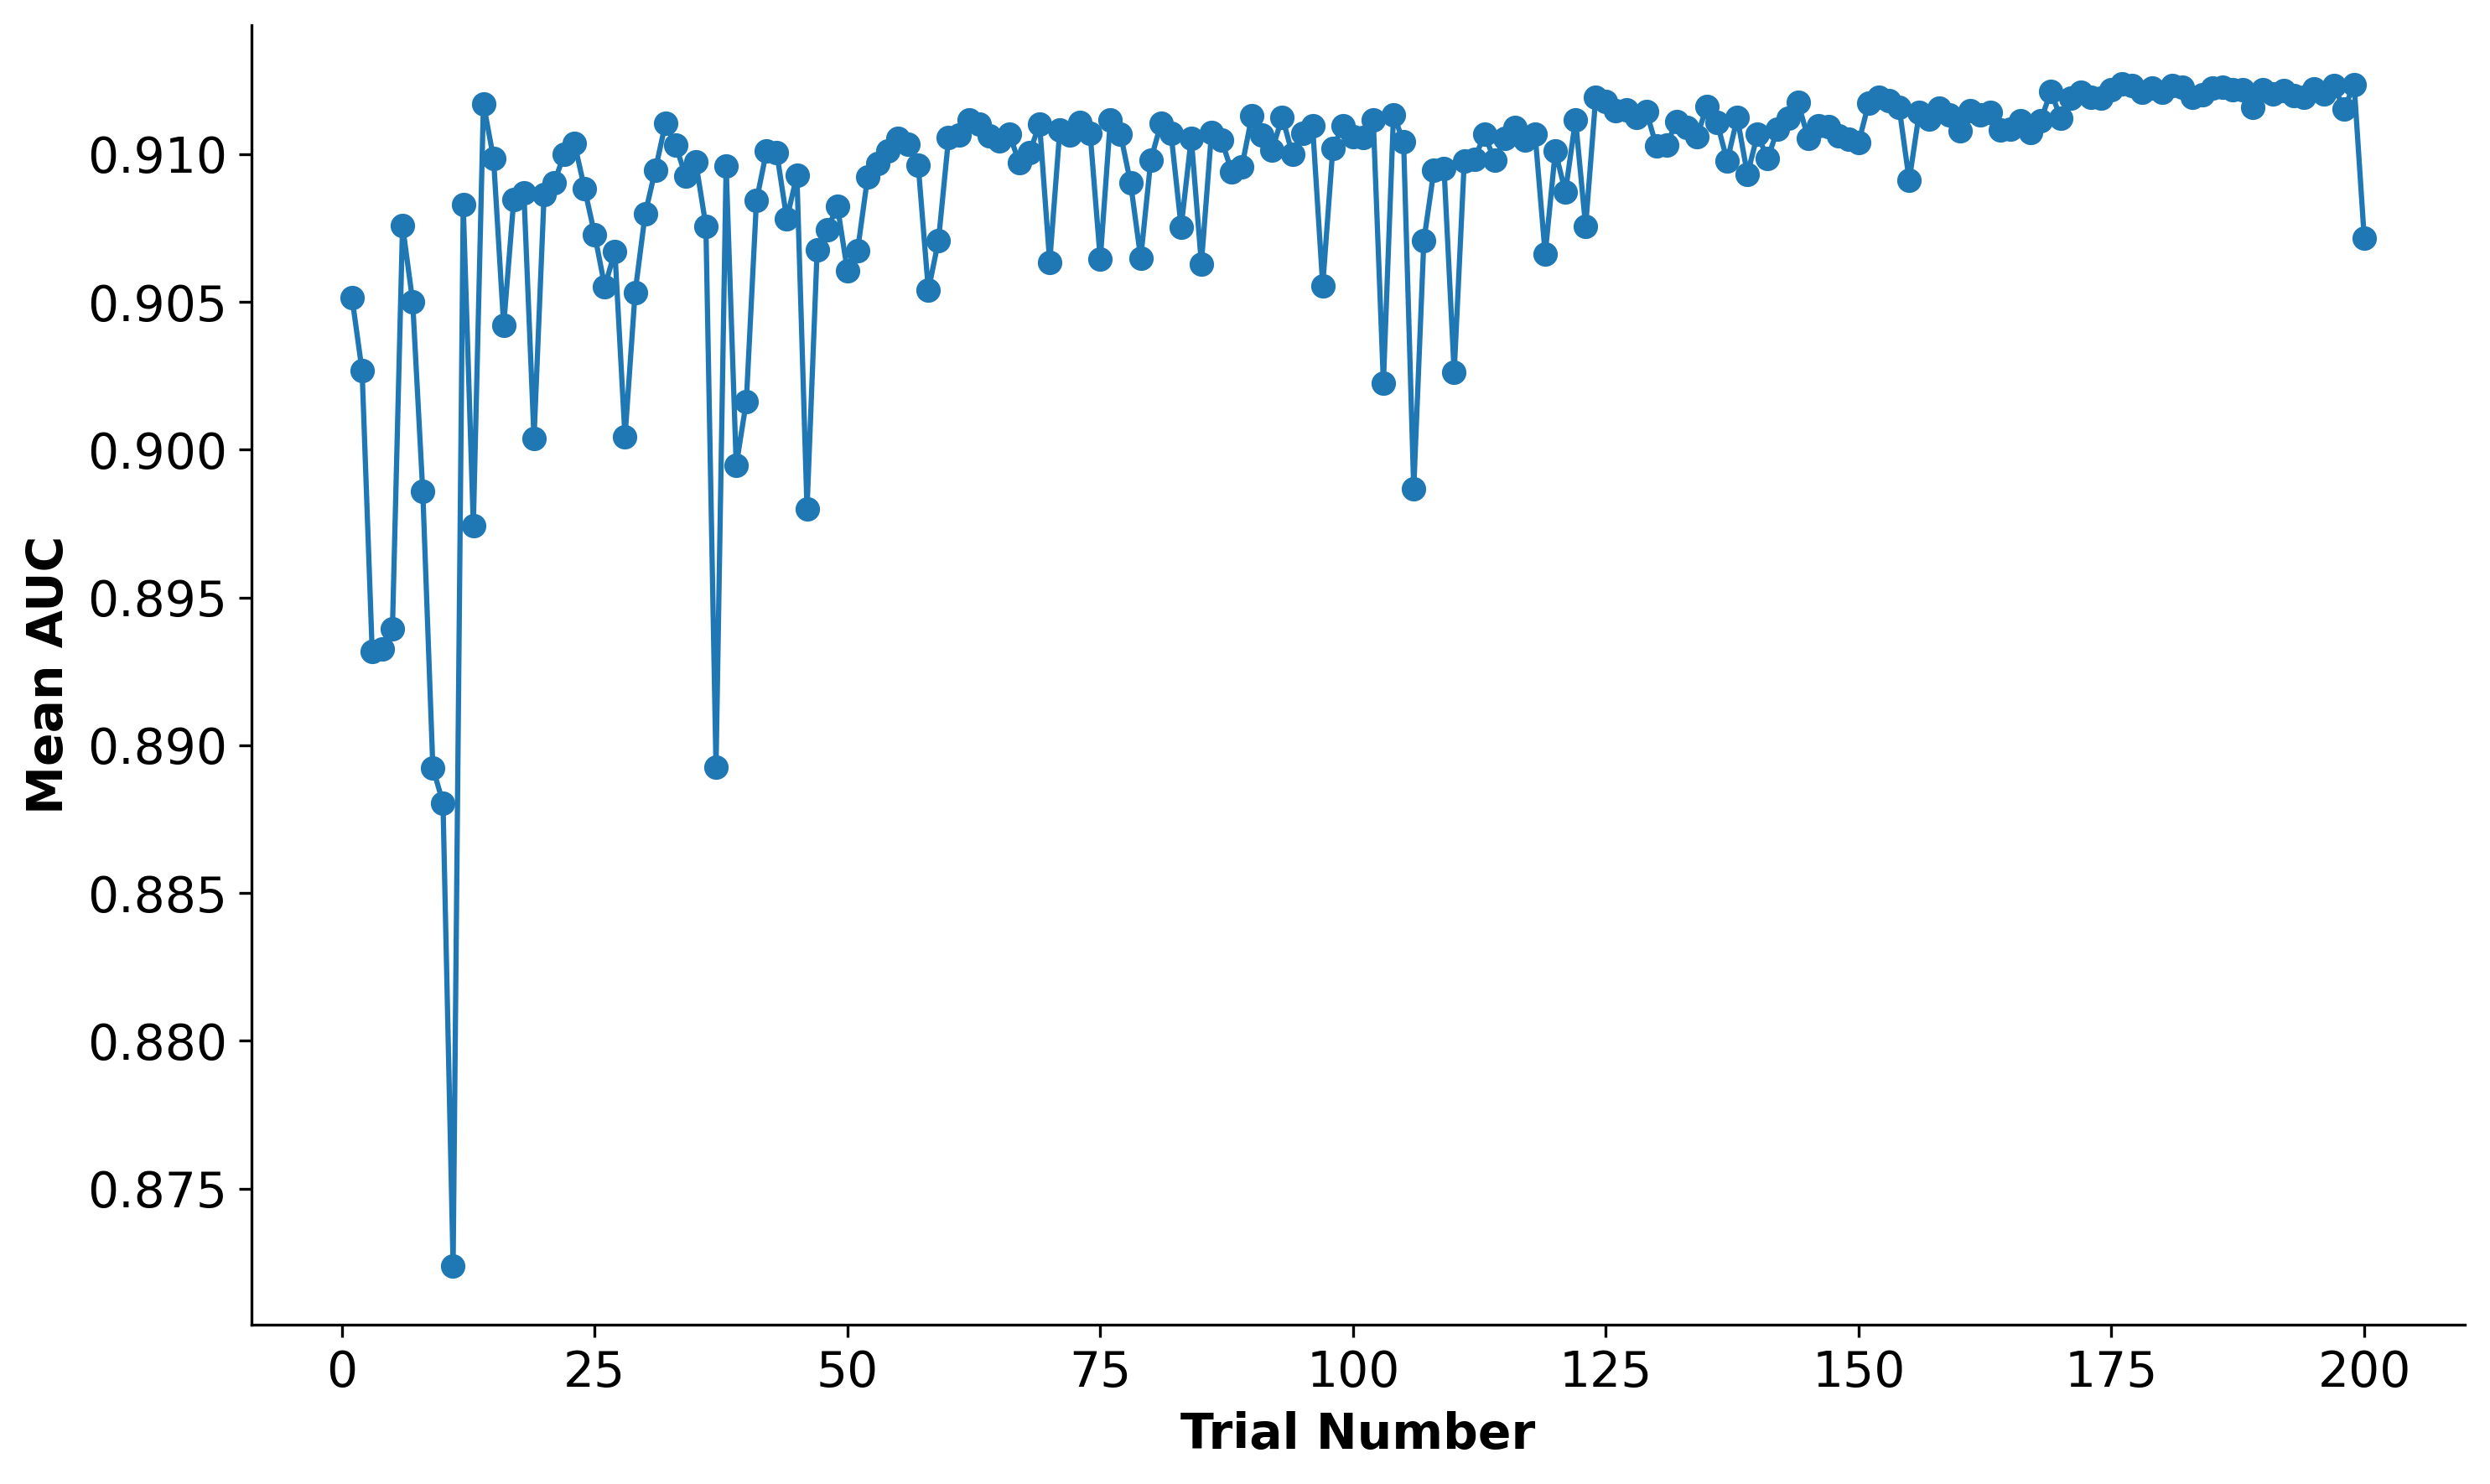

In [189]:
import json

# Save the best parameters
with open("best_params.json", "w") as f:
    json.dump(best_params, f)

# Save the AUC scores
auc_df = pd.DataFrame({
    'Trial': range(1, len(results_optuna) + 1),
    'Mean AUC': results_optuna})
#    'Params': params_optuna
#})
auc_df.to_csv("optuna_auc_scores.csv", index=False)

#print("Best model, parameters, and AUC scores have been saved.")
# Plot the trial number vs mean AUC
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(results_optuna) + 1), results_optuna, marker='o', linestyle='-')
plt.xlabel('Trial Number', fontsize=14, fontweight='bold')
plt.ylabel('Mean AUC', fontsize=14, fontweight='bold')

# Optionally, set x and y ticks fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.title('Optuna Optimization: Trial vs Mean AUC')
#plt.grid(True)

plt.tight_layout()
plt.savefig('optuna_optimization_trial_vs_mean_auc.png', dpi=300, bbox_inches='tight')

sns.despine()

# Show the figure
plt.show()

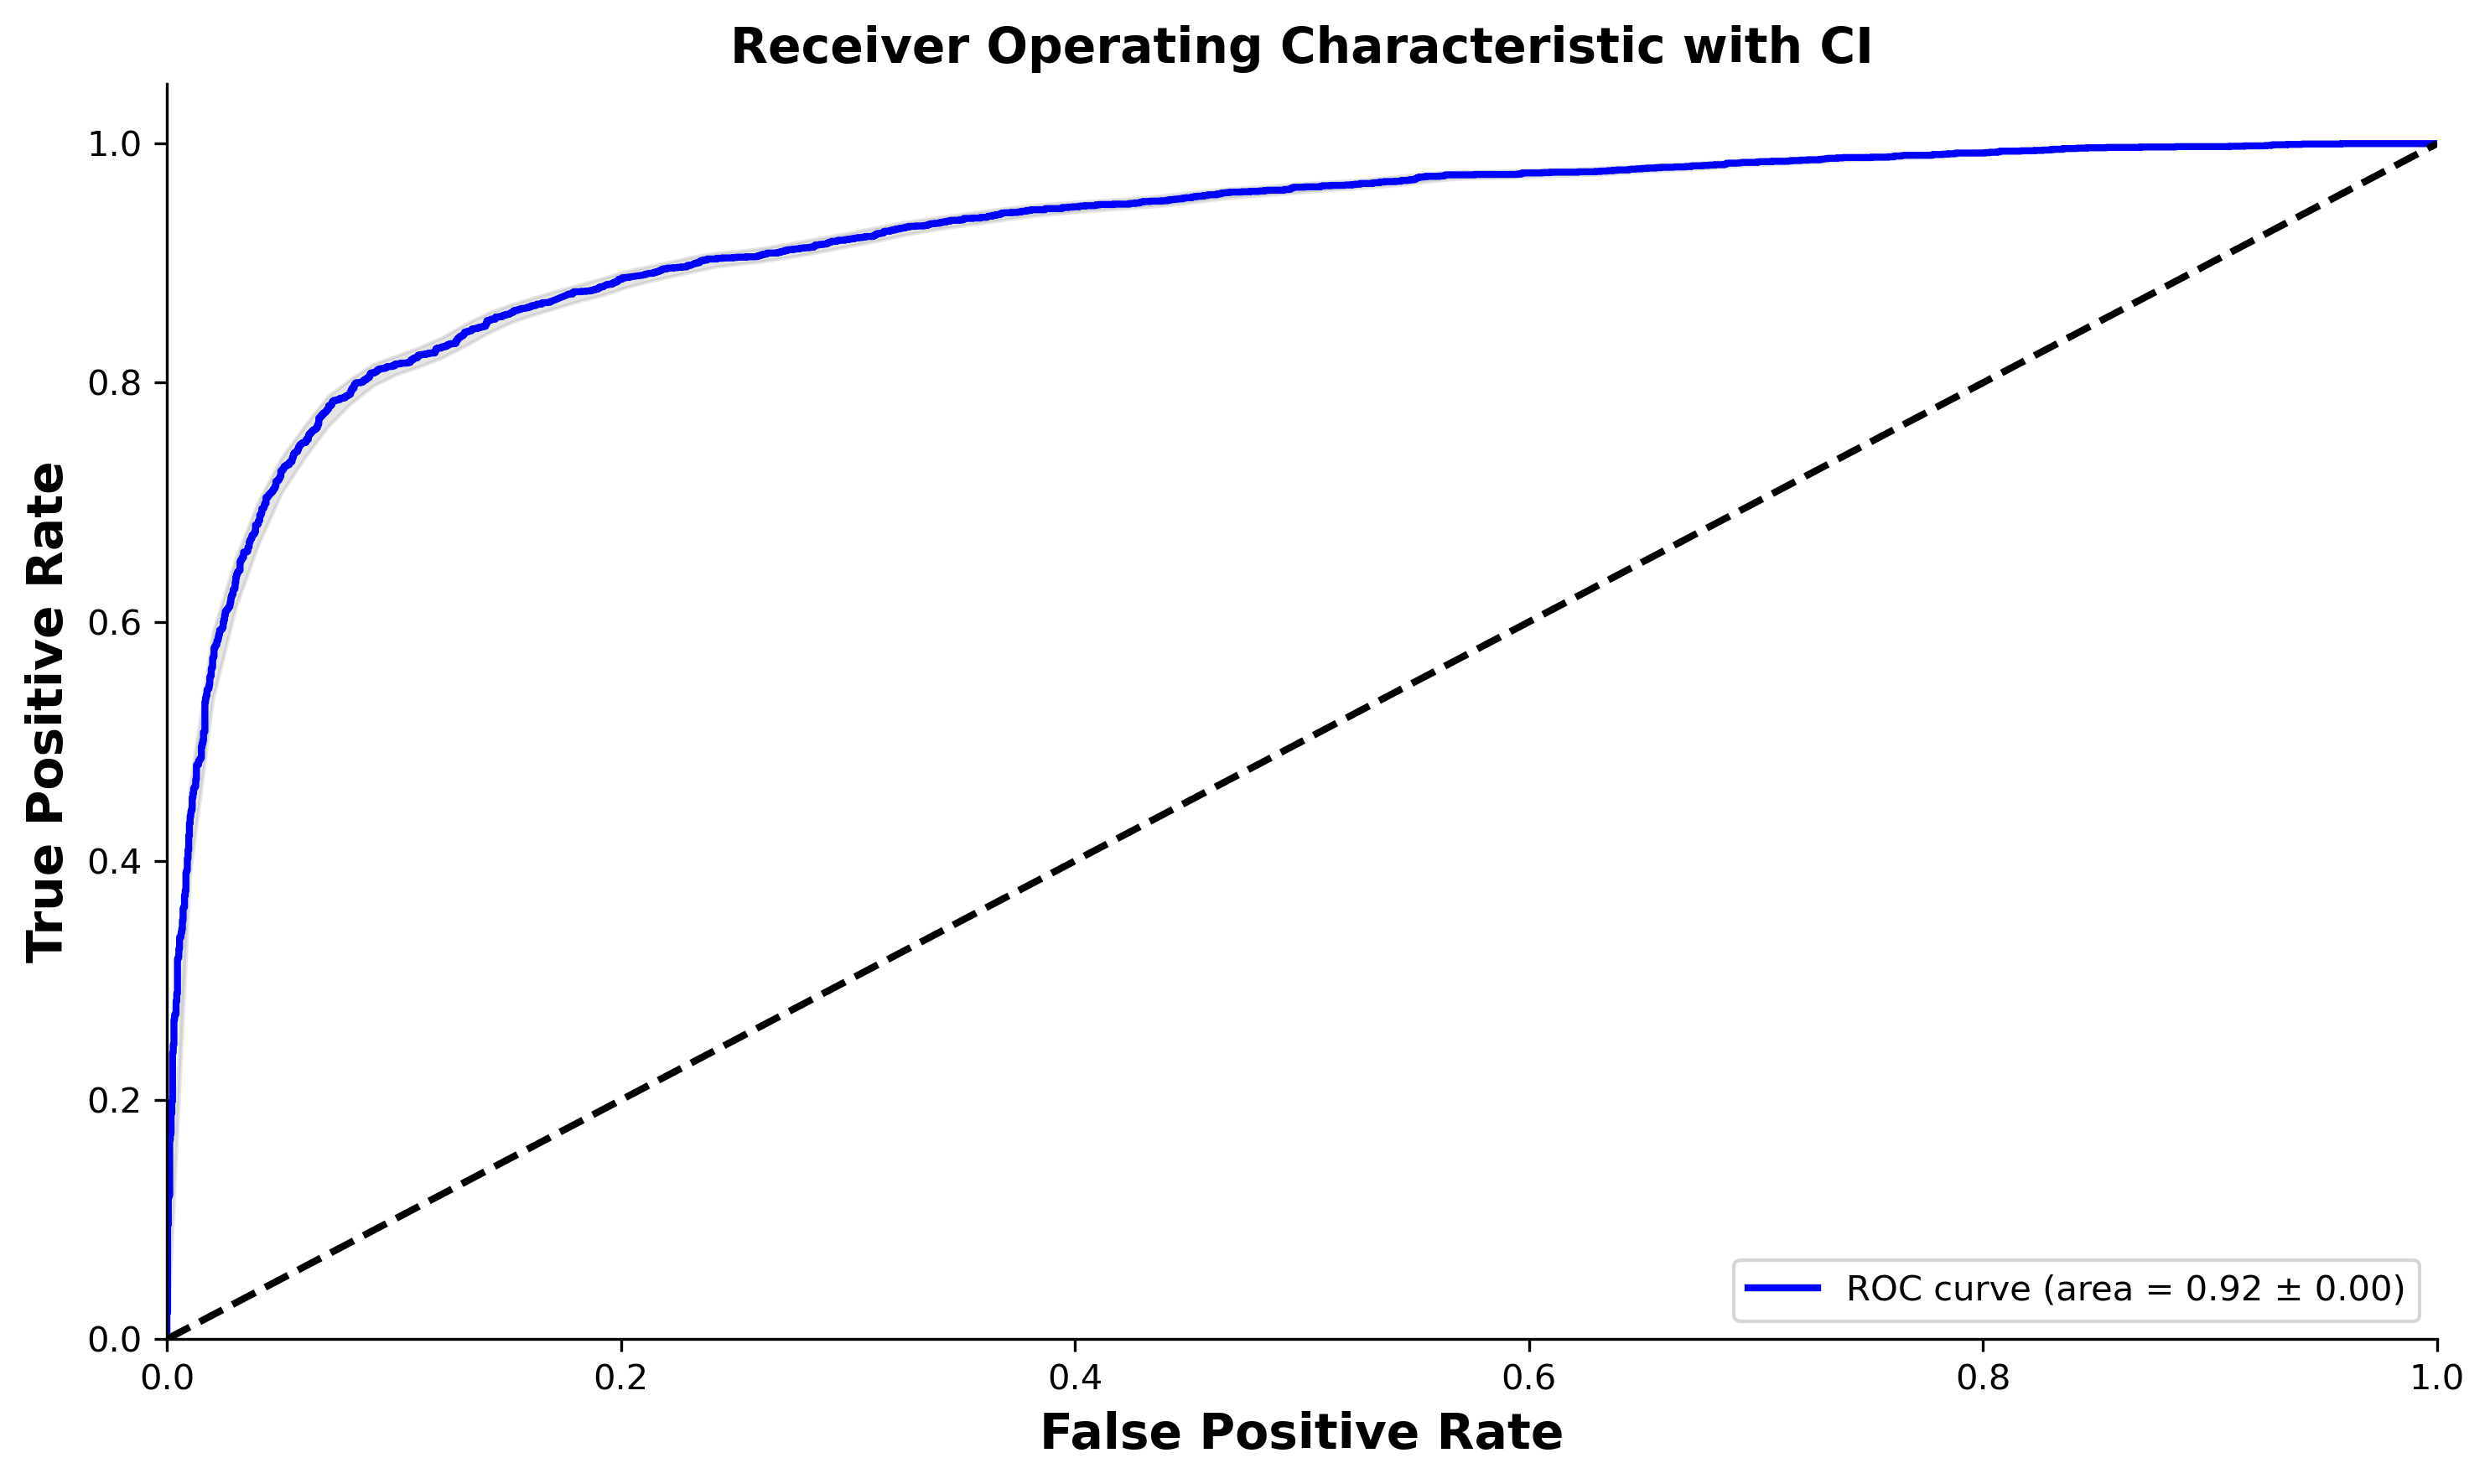

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
def evaluate_xgboost_model(X_train, X_test, y_train, y_test, xg_best_trial_params):
    final_xg_model = XGBClassifier(**best_params)
    final_xg_model.fit(X_train, y_train)
    
    # Predict classes
    y_pred_train = final_xg_model.predict(X_train)
    y_pred_test = final_xg_model.predict(X_test)
    
    # Calculate accuracy on training and test sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Save the trained model
    joblib.dump(final_xg_model, "best_xgb_model.NEW.combined.joblib")
    
    return final_xg_model, test_accuracy

def plot_roc_with_ci(model, X_test, y_test, n_bootstraps=1000, seed=42):
    # Compute the ROC curve and AUC for the original data
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Initialize variables for bootstrapping
    rng = np.random.RandomState(seed)
    bootstrapped_scores = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i in range(n_bootstraps):
        # Bootstrap sample
        indices = rng.randint(0, len(X_test), len(X_test))
        if len(np.unique(y_test[indices])) < 2:
            continue
        
        y_pred_proba_boot = model.predict_proba(X_test[indices])[:, 1]
        fpr_boot, tpr_boot, _ = roc_curve(y_test[indices], y_pred_proba_boot)
        tprs.append(np.interp(mean_fpr, fpr_boot, tpr_boot))
        tprs[-1][0] = 0.0
        bootstrapped_scores.append(auc(fpr_boot, tpr_boot))
    
    # Calculate mean and std of the tprs
    tprs = np.array(tprs)
    mean_tpr = tprs.mean(axis=0)
    std_tpr = tprs.std(axis=0)
    
    # Calculate the mean and std for AUC
    mean_auc = np.mean(bootstrapped_scores)
    std_auc = np.std(bootstrapped_scores)
    
    # Plot the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = {:.2f} ± {:.2f})'.format(roc_auc, std_auc))
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='grey', alpha=0.2)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
    plt.title('Receiver Operating Characteristic with CI', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.tight_layout()
    sns.despine()
    plt.savefig('final_roc_curve_with_ci.png', dpi=300)
    plt.show()

final_xg_model, test_accuracy = evaluate_xgboost_model(X_combined_train, X_combined_test, y_combined_train, y_combined_test, best_params)
plot_roc_with_ci(final_xg_model, X_combined_test, y_combined_test)
# Create a SHAP explainer object
# Create a SHAP explainer object using TreeExplainer


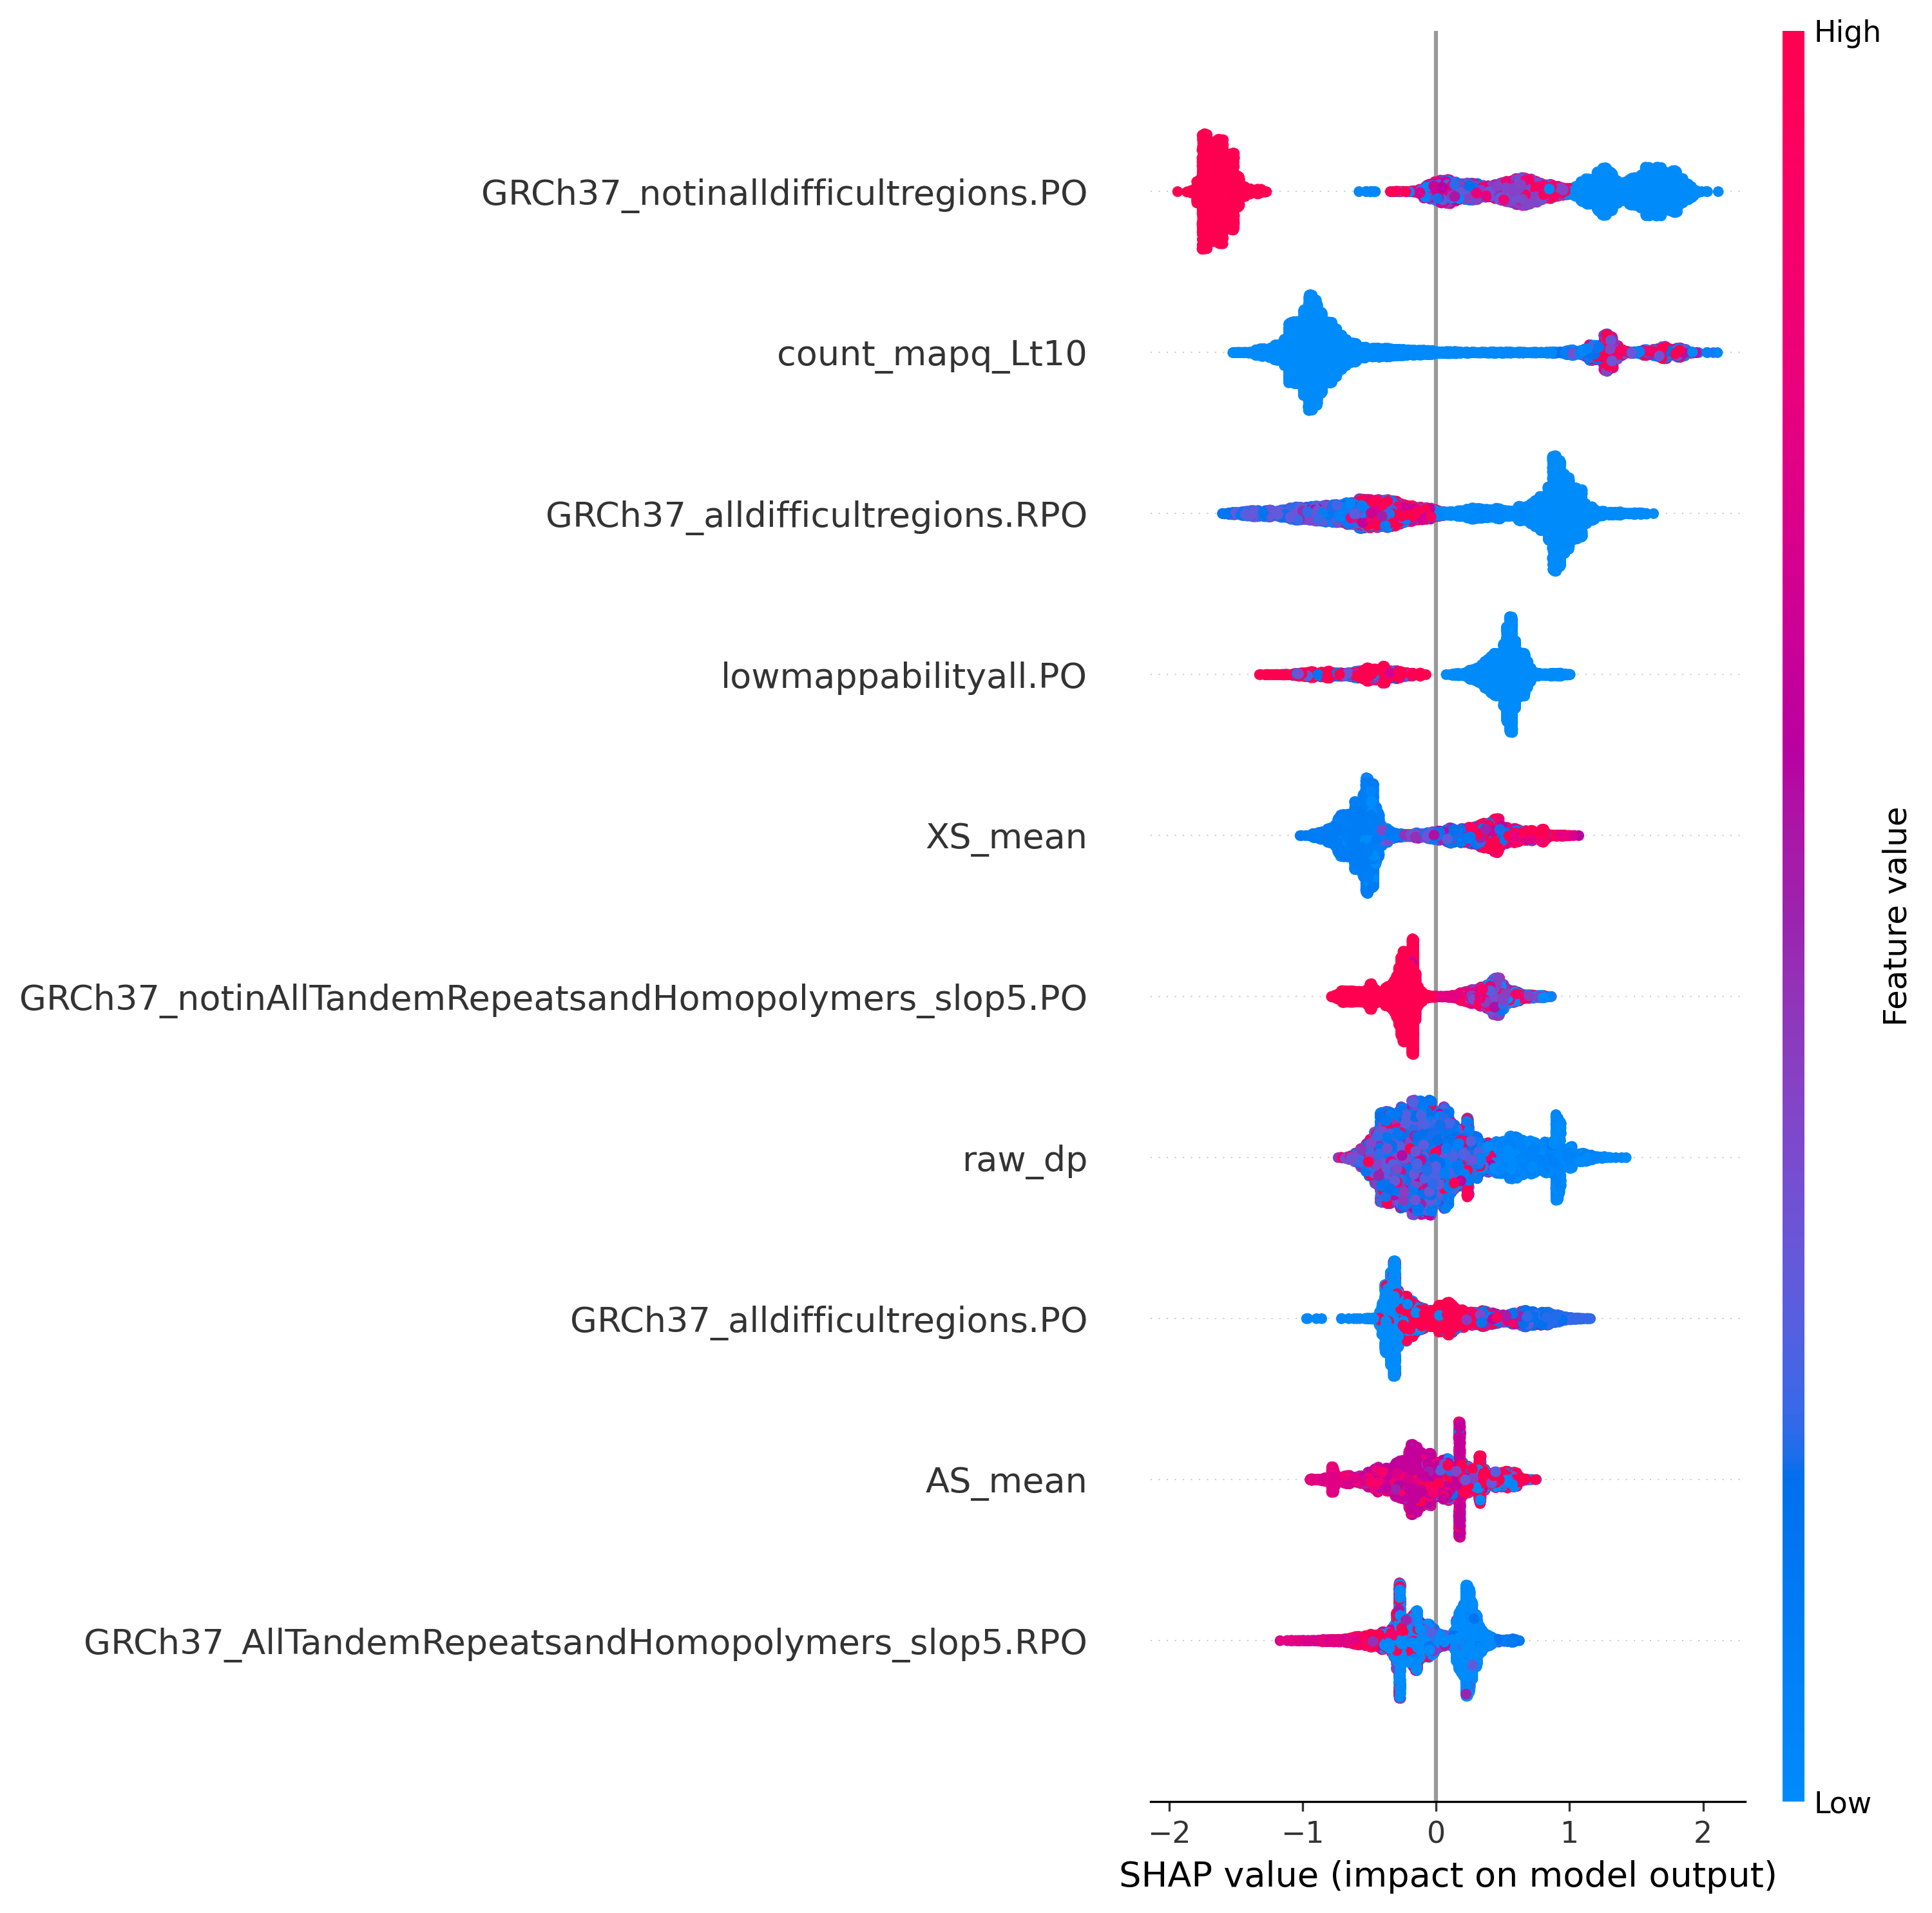

<Figure size 1920x1440 with 0 Axes>

In [44]:
import shap
explainer = shap.TreeExplainer(final_xg_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X)
feature_names = data_filtered_df.columns

fig = shap.summary_plot(shap_values, X, plot_type='dot', plot_size=(10, 10),
                  feature_names=feature_names, max_display=10, color=plt.get_cmap("tab10"))

plt.savefig('feature_importance.shap.png', dpi=400, bbox_inches='tight')


In [174]:
model_anno_df = pd.read_csv("model_probe_gene.bed", sep='\t', header=None)
model_anno_df.columns=['CHROM', "START", "STOP", "GENE"]
model_anno_df['probe'] = model_anno_df['CHROM'] + "_" + model_anno_df['START'].astype(str) + "_" + model_anno_df['STOP'].astype(str)
model_anno_df = model_anno_df[['probe', 'GENE']]
model_anno_df

#
shap_df = pd.DataFrame(shap_values, columns = feature_names)
shap_df.to_csv("shap_data_model.csv", index=None)

#shap_df
shap_df['Class'] = data_filtered_labels_df['labels']

shap_df['probe'] = data_train_df.probe
shap_df = pd.merge(shap_df, model_anno_df, on='probe', how='left')
#shap_df = shap_df.drop(['probe'], axis=1)


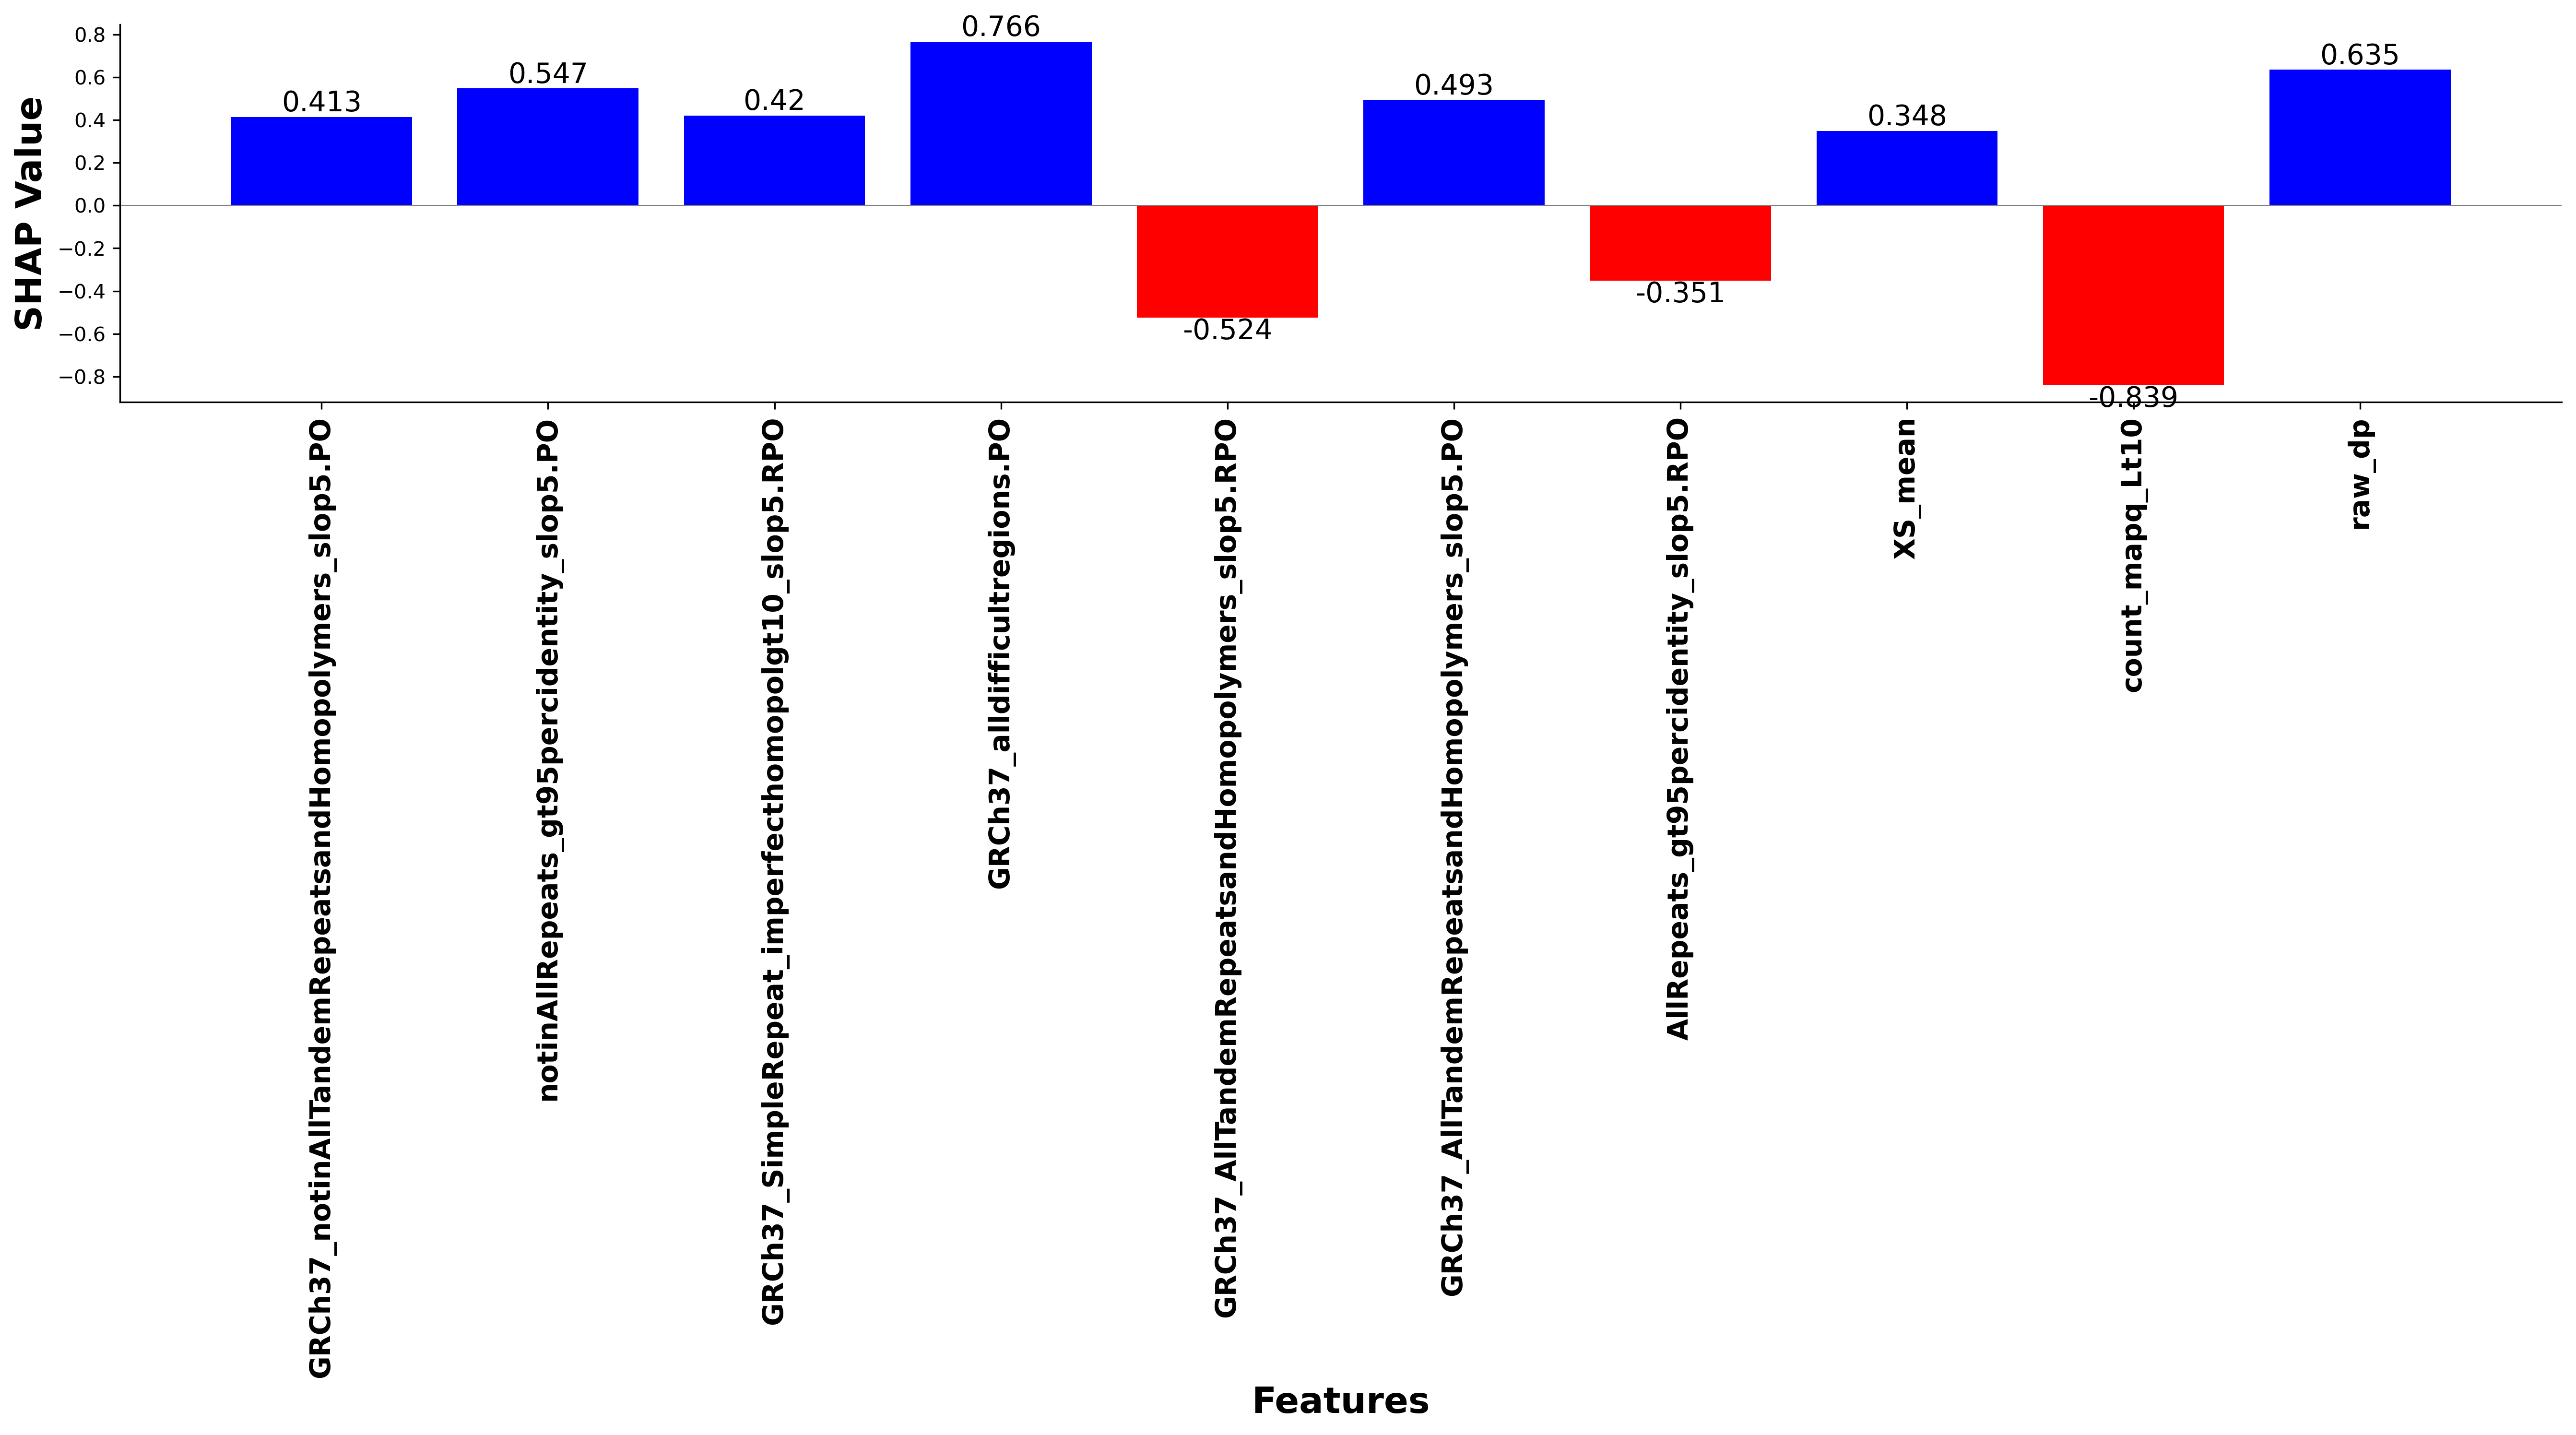

In [171]:
#PKD1 Exon 46

genes_of_interest = ['ABCD1','PKD1', 'PMS2', 'STRC', "MYH7"]
shap_GOI_df = shap_df[shap_df['GENE'].isin(genes_of_interest)]
shap_GOI_df = shap_GOI_df.reset_index(drop=True)
pkd1_ex46_data = pd.DataFrame(shap_GOI_df.iloc[5][:16])
pkd1_ex46_data_df = pd.DataFrame(pkd1_ex46_data)
pkd1_ex46_data_df = pkd1_ex46_data_df.reset_index()
pkd1_ex46_data_df.columns = ['Features', 'SHAP values']
pkd1_ex46_data_df =pkd1_ex46_data_df[pkd1_ex46_data_df['SHAP values'].abs() > 0.3]
plt.figure(figsize=(18, 10))
bars = plt.bar(pkd1_ex46_data_df['Features'], pkd1_ex46_data_df['SHAP values'], color=['blue' if value >= 0 else 'red' for value in pkd1_ex46_data_df['SHAP values']])
plt.xlabel('Features', fontsize=18, fontweight='bold')
plt.ylabel('SHAP Value', fontsize=18, fontweight='bold')
#plt.title('SHAP Values for Features', fontsize=14)
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.axhline(0, color='gray', linewidth=0.5)  # Add a horizontal line at y=0 for reference

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), va='bottom' if yval > 0 else 'top', ha='center', fontsize=14)

plt.tight_layout()
sns.despine()
plt.savefig('SHAP_feature_importance_PKD1_exon46.png', dpi=300)
plt.show()
plt.show()


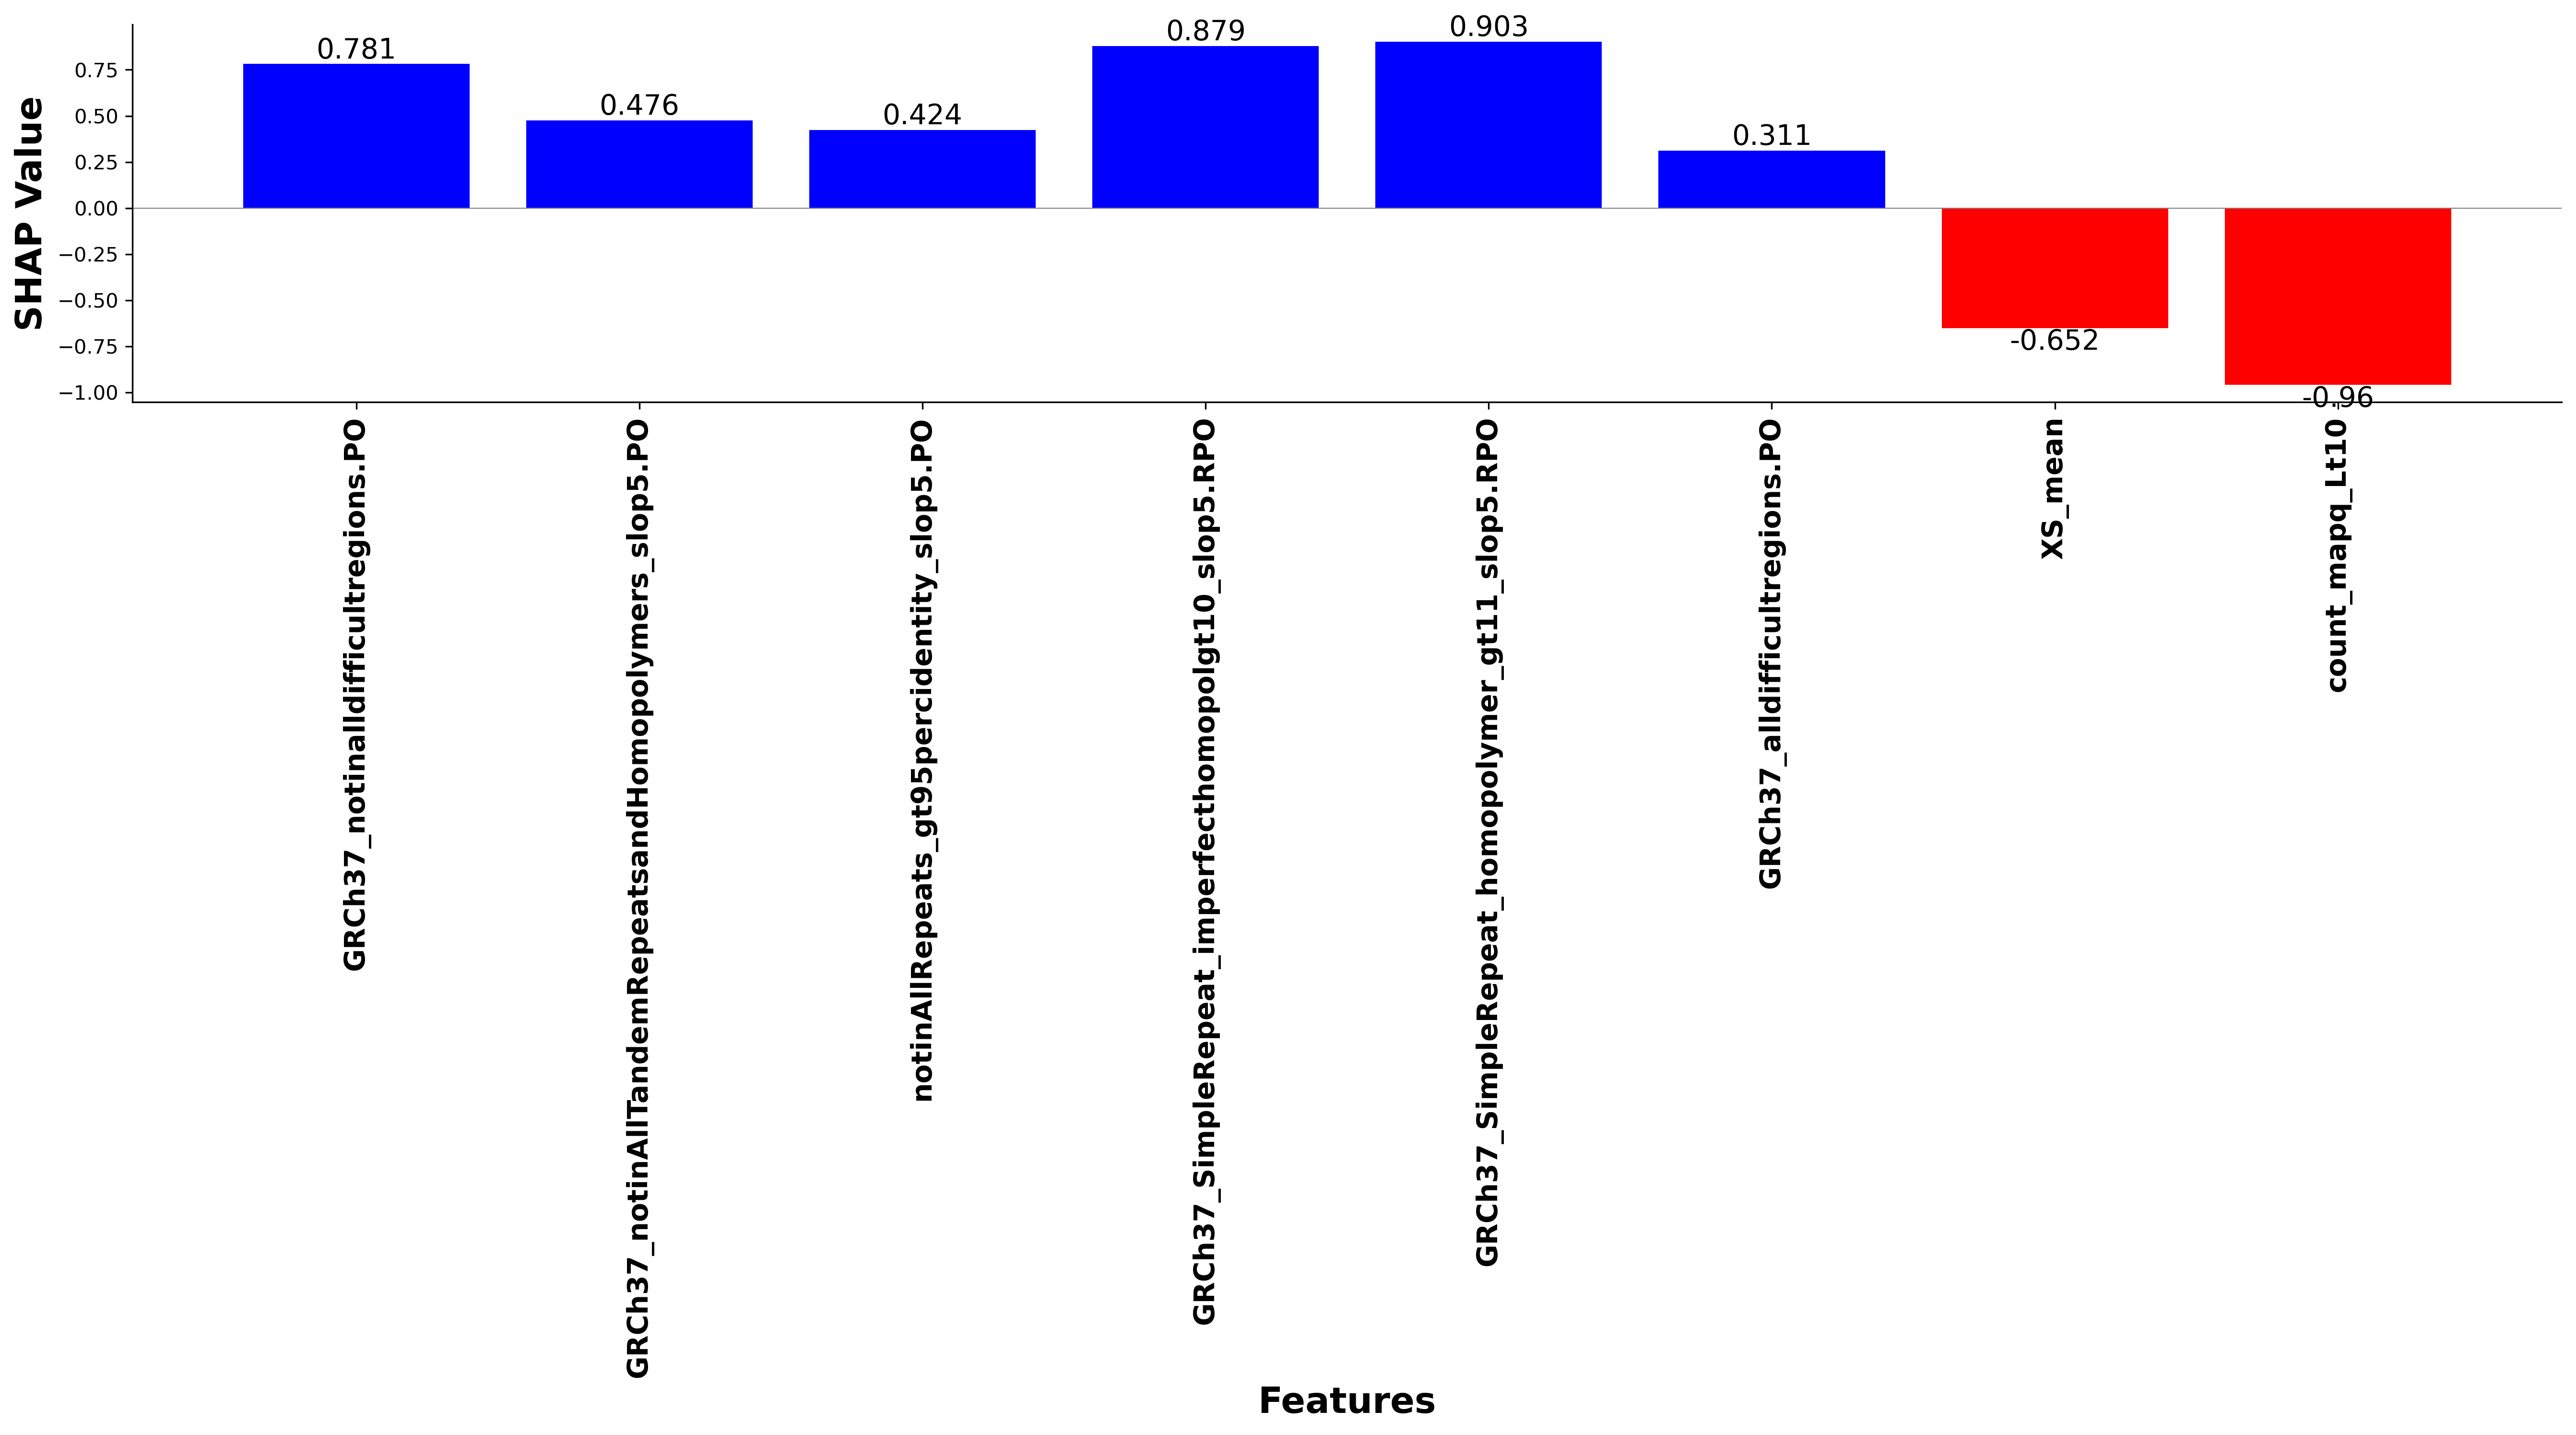

In [173]:

shap_GOI_PKD1_ex23_df = pd.DataFrame(shap_GOI_df.iloc[6][:16])
shap_GOI_PKD1_ex23_df = shap_GOI_PKD1_ex23_df.reset_index()
shap_GOI_PKD1_ex23_df.columns = ['Features', 'SHAP Values']

shap_GOI_PKD1_ex23_df =shap_GOI_PKD1_ex23_df[shap_GOI_PKD1_ex23_df['SHAP Values'].abs() > 0.3]
plt.figure(figsize=(18, 10))
bars = plt.bar(shap_GOI_PKD1_ex23_df['Features'], shap_GOI_PKD1_ex23_df['SHAP Values'], color=['blue' if value >= 0 else 'red' for value in shap_GOI_PKD1_ex23_df['SHAP Values']])
plt.xlabel('Features', fontsize=18, fontweight='bold')
plt.ylabel('SHAP Value', fontsize=18, fontweight='bold')
##plt.title('SHAP Values for Features', fontsize=14)
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.axhline(0, color='gray', linewidth=0.5)  # Add a horizontal line at y=0 for reference

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), va='bottom' if yval > 0 else 'top', ha='center', fontsize=14)

plt.tight_layout()
sns.despine()
plt.savefig('SHAP_feature_importance_PKD1_ex23.png', dpi=300)
plt.show()


In [178]:
data_test_cols_df = valid_data_df[features_to_keep]
data_test_cols_df = data_test_cols_df.fillna(0)
X_test2_scaled = scaler.transform(data_test_cols_df)
X_test2_scaled
loaded_model = joblib.load("best_xgb_model.NEW.combined.joblib")
predictions = loaded_model.predict(X_test2_scaled).tolist()
pred_probabilities = loaded_model.predict_proba(X_test2_scaled).tolist()
valid_data_df['prob_pred_1'] = [prob[1] for prob in pred_probabilities]
valid_data_df['prob_pred_0'] = [prob[0] for prob in pred_probabilities]
valid_data_df['prediction'] = predictions
#valid_data_df.prediction.value_counts()
valid_data_df.to_csv('SangerVariants_VerSamples_IDTProbes.400data.resutls.newmodel.csv', index=None)

/projects/wangc/rohan/miniconda3/envs/thesis/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [181]:
column_list = valid_data_df.columns.tolist()
with open('input_data.column.ordered.list', 'w+') as fout:
    for i in column_list:
        fout.write(i + '\n')
        

In [184]:
model_column_list = data_filtered_df.columns.tolist()
with open('model_column.ordered.list', 'w+') as fout:
    for i in model_column_list:
        fout.write(i + '\n')

In [186]:
scaler_path = ('model_scaler.pkl')
joblib.dump(scaler, scaler_path)

['model_scaler.pkl']